# Jupyter Notebook for Lead Scoring Case Study
by Vivek Chauhan, Vishesh Divya and Aryan Jain

### Importing the important libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Reading and understanding the input data

In [2]:
# reading the input data file 
leads= pd.read_csv('Leads.csv')

In [3]:
# Checking Shape of Data
leads.shape

(9240, 37)

In [4]:
# setting parameters to see all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# viewing data head
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [5]:
# understanding data types and null values by column
print(leads.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- we see a lot of missing values across multiple columns
- There are many columns which are categorical, we will have to understand these better and do feature engineering to rationalize features 

In [6]:
# Understanding the basic statistics on key numerical columns
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

- for numerical variables Total Visits, Time Spend on Website - we see some extreme values which we will solve for in EDA part

#### Understanding Columns with Missing values

In [7]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

we see high number of null values for the columns esp for Columns
- AsAsymmetrique Activity Index                    4218
- Asymmetrique Profile Index                       4218
- Asymmetrique Activity Score                      4218
- Asymmetrique Profile Score                       4218
- Tags                                             3353
- Lead Quality                                     4767

We will be dropping the columns which have more than 30% missing values

In [8]:
# We also see that there are select value in the date which should be replaced by NUlls
leads = leads.replace(['Select', 'select'], np.nan)

In [9]:
# Viewing the NULL values again
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# finding % of nulls in each column
miss_perc=((leads.isnull().sum()/leads.shape[0])*100).reset_index().rename(columns={"index":"col_nm", 0:"missing_perc"})

# getting columns to be dropped in a list - we will be dropping columns which have more than 30% missing values
drop_list=list(miss_perc[miss_perc.missing_perc>=30]['col_nm'])

In [11]:
print(drop_list)

['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [12]:
# Dropping columns which have more than 30% values missing
leads.drop(drop_list, axis=1, inplace=True)

In [13]:
leads.shape

(9240, 27)

In [14]:
# filling XNA, XAP, NA with null values
leads.replace('NA', np.NaN, inplace=True)
leads.replace('XNA', np.NaN, inplace=True)
leads.replace('XAP', np.NaN, inplace=True)

In [15]:
# recheck missing values
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

- there are no more nulls identified
- we can remove those records where columns have very few values are missing values.
- Thus,  dropping the rows which have missing value of the following columns - Lead Source, TotalVisits, Page Views Per Visit, Last Activity

In [16]:
print(leads.shape)
leads = leads.dropna(subset='Lead Source')
leads = leads.dropna(subset='TotalVisits')
leads = leads.dropna(subset='Page Views Per Visit')
leads = leads.dropna(subset='Last Activity')
print(leads.shape)

(9240, 27)
(9074, 27)


In [17]:
# recheck missing values
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                          2296
What is your current occupation                  2683
What matters most to you in choosing a course    2702
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [18]:
# Viewing Data Head
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country What is your current occupation  \
0     NaN                      Unemployed   
1   India                      Unemployed   
2   India                         Student   
3   India                      Unemployed   
4   India                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

  Update me on Supply Chain Content Get updates on DM Content  \
0                                No                        No   
1                                No                        No   
2                                No                        No   
3                                No                        No   
4                                No                        No   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [19]:
# creating list of Categorical and numerical columns

var_cat =['Lead Origin', 'Lead Source','Do Not Email','Do Not Call','Last Activity', 'Country','What is your current occupation',
          'What matters most to you in choosing a course', 'Search','Magazine','Newspaper Article', 'X Education Forums',
          'Newspaper','Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses',
          'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque',
          'A free copy of Mastering The Interview', 'Last Notable Activity']

var_num = ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']


# Understanding each Column individually
- we will be using a user defined function to visualize the data across multiple columns and make necessary observations required for variable selection and feature engineering

In [20]:
# defining a user defined function to make plots for list of variables
def uni_plot(leads, leads_tgt0, leads_tgt1, column):
    leads=leads
    leads_tgt0=leads_tgt0
    leads_tgt1=leads_tgt1
    col=column
    
    fig = plt.figure(figsize=(16,8))
    
    # creating pie subplot
    ax1=plt.subplot(2,2,1)
    leads[col].value_counts().plot.pie(autopct= "%1.0f%%", ax=ax1)
    plt.title("Pie chart for column :"+ column)
    
    
    # creating absolute value count plot
    ax2=plt.subplot(2,2,2)
    sns.countplot(x=col, hue='Converted', data=leads, ax=ax2)
    plt.xticks(rotation=90)
    plt.title("Count plot for target variable vs column :"+ column)
    
    fig.tight_layout()
    
    plt.show()

In [21]:
# splitting the data into two segments with Converted = 0 and Converted =1 
# Data with Converted = 0
leads_tgt0 = leads[leads.Converted==0]

#Data with Converted =1
leads_tgt1 = leads[leads.Converted==1]

 Univariate Analysis for column :  Lead Origin


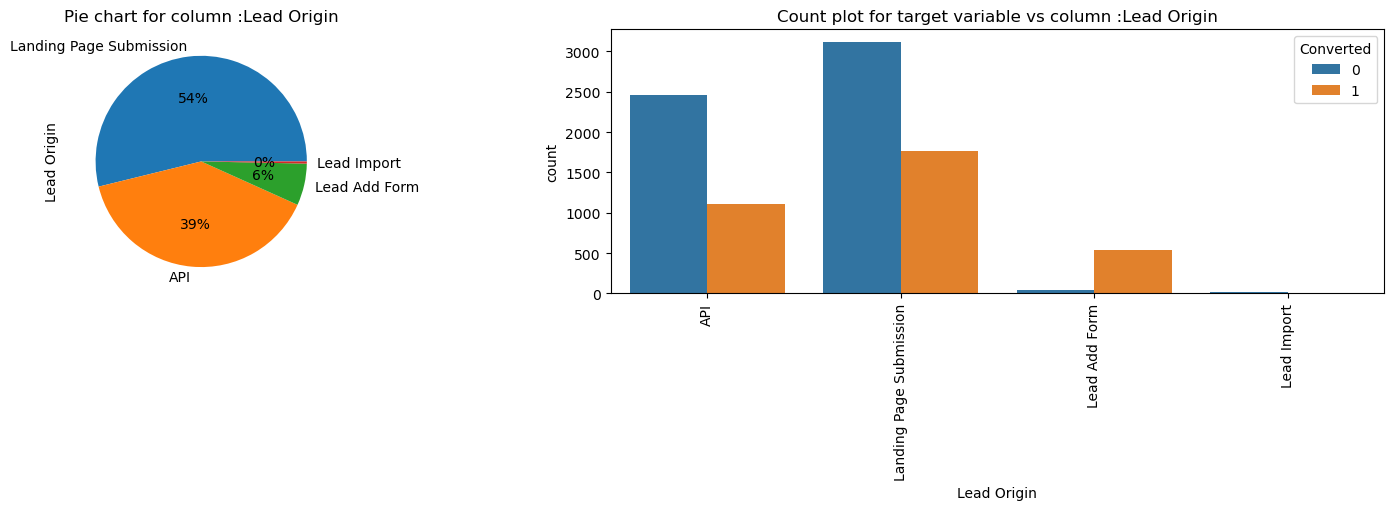

 Univariate Analysis for column :  Lead Source


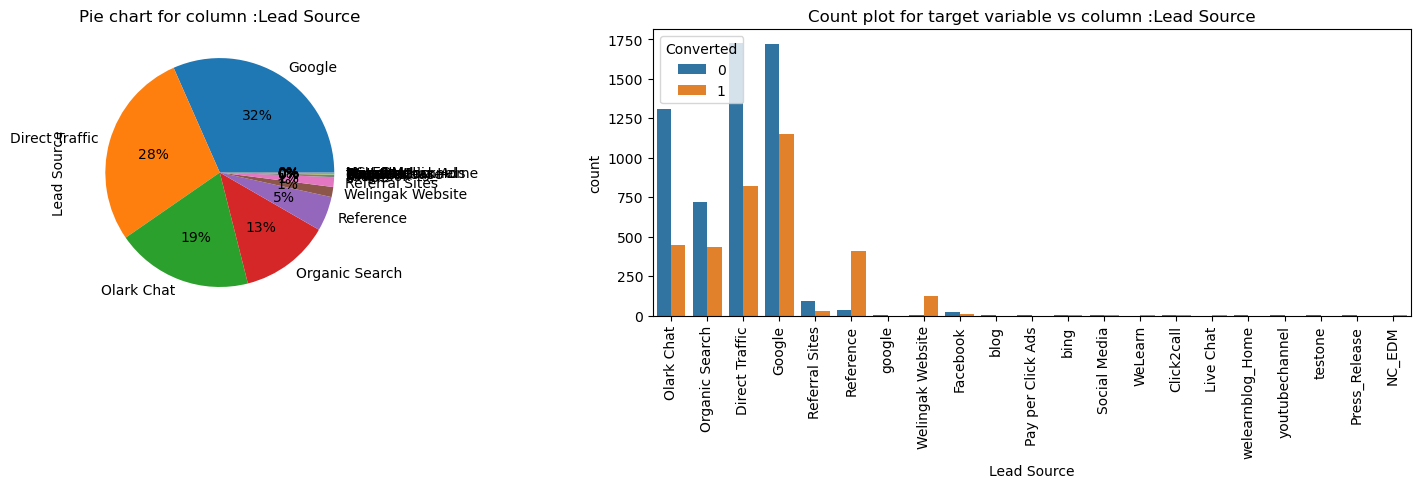

 Univariate Analysis for column :  Do Not Email


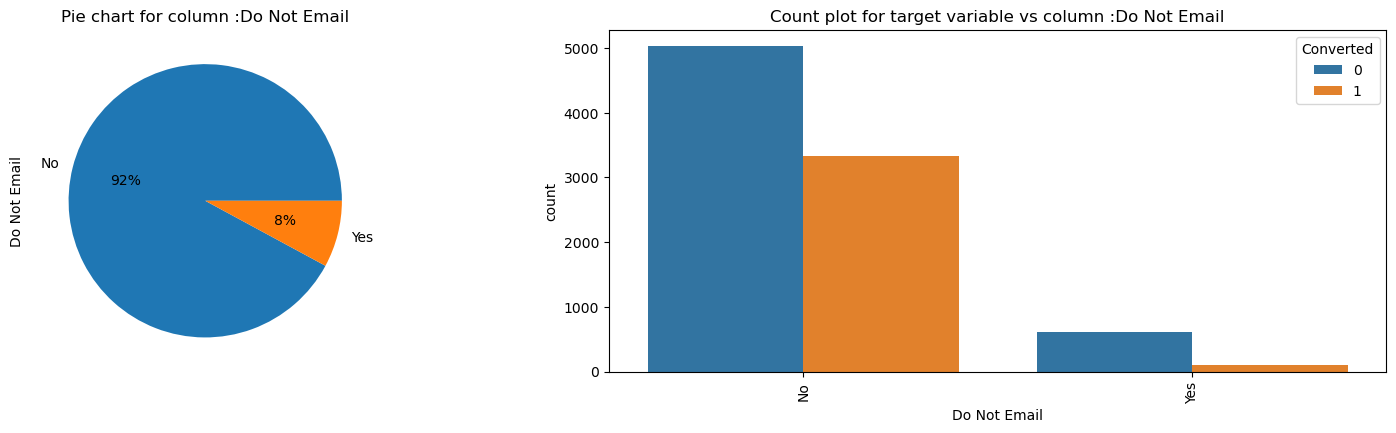

 Univariate Analysis for column :  Do Not Call


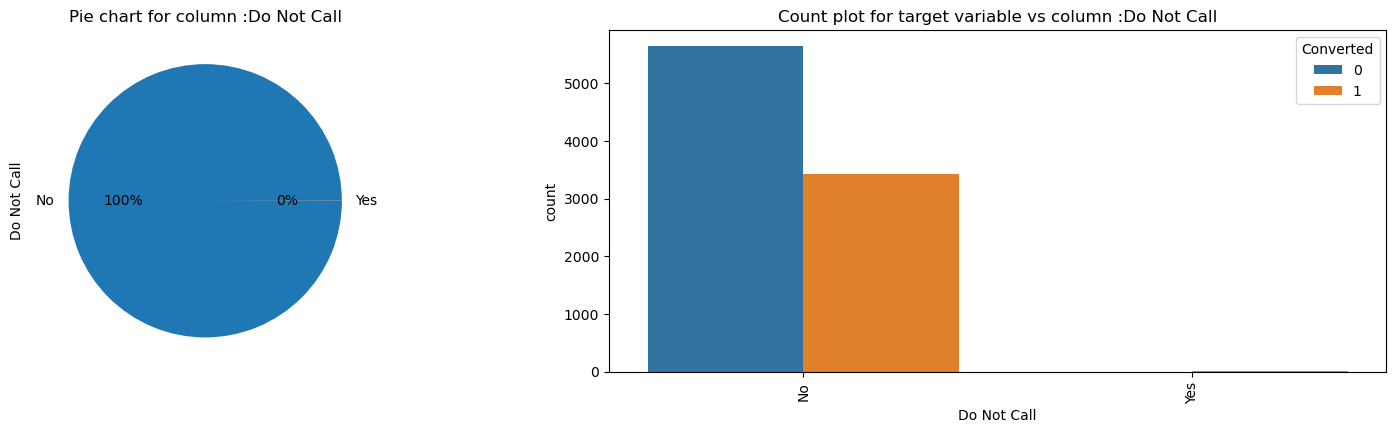

 Univariate Analysis for column :  Last Activity


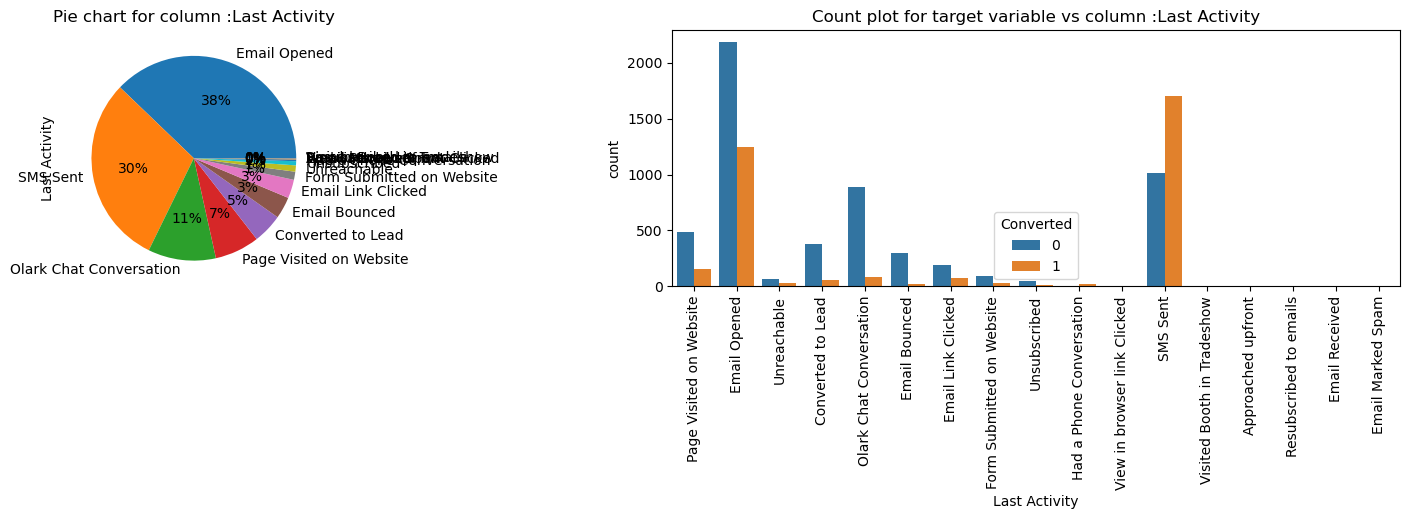

 Univariate Analysis for column :  Country


 Univariate Analysis for column :  What is your current occupation


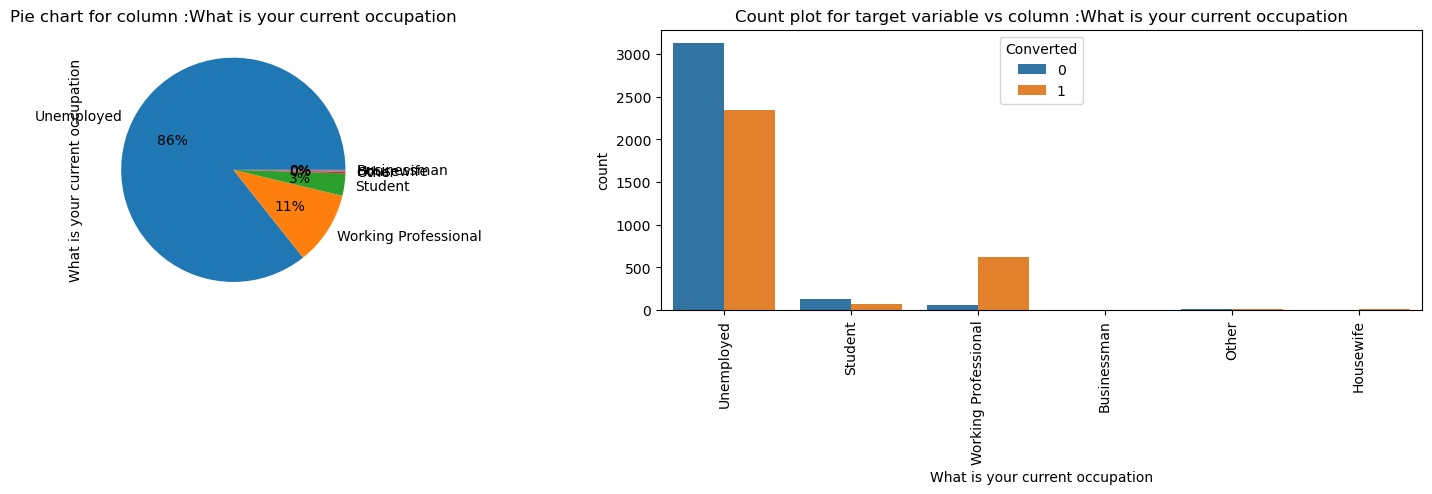

 Univariate Analysis for column :  What matters most to you in choosing a course


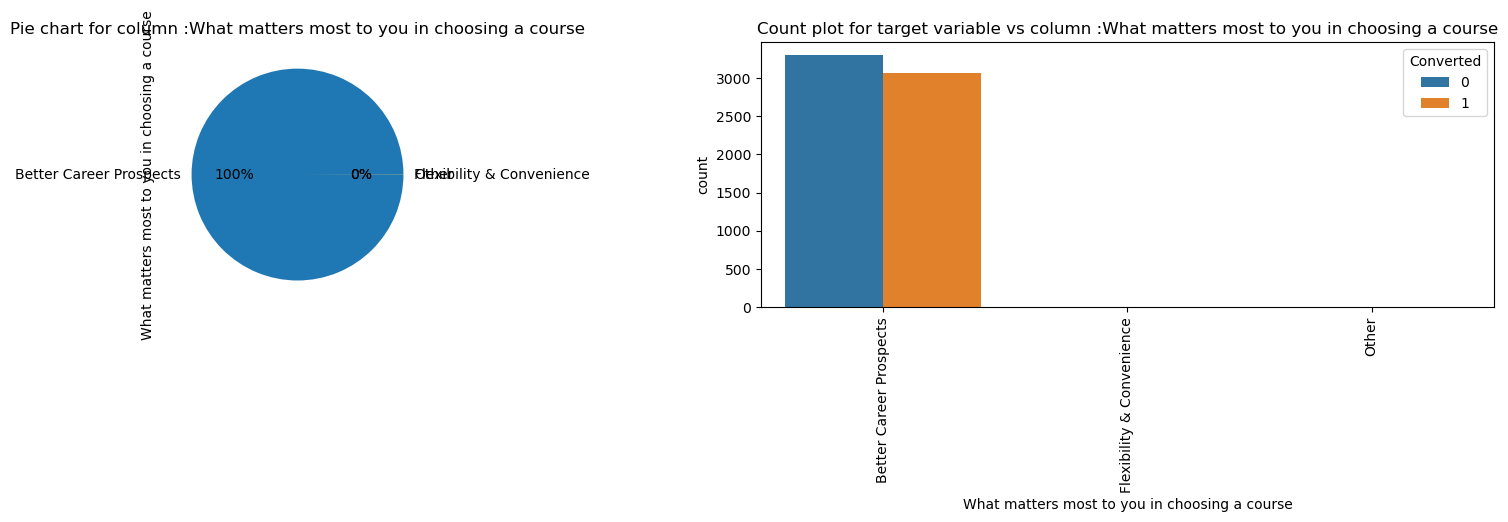

 Univariate Analysis for column :  Search


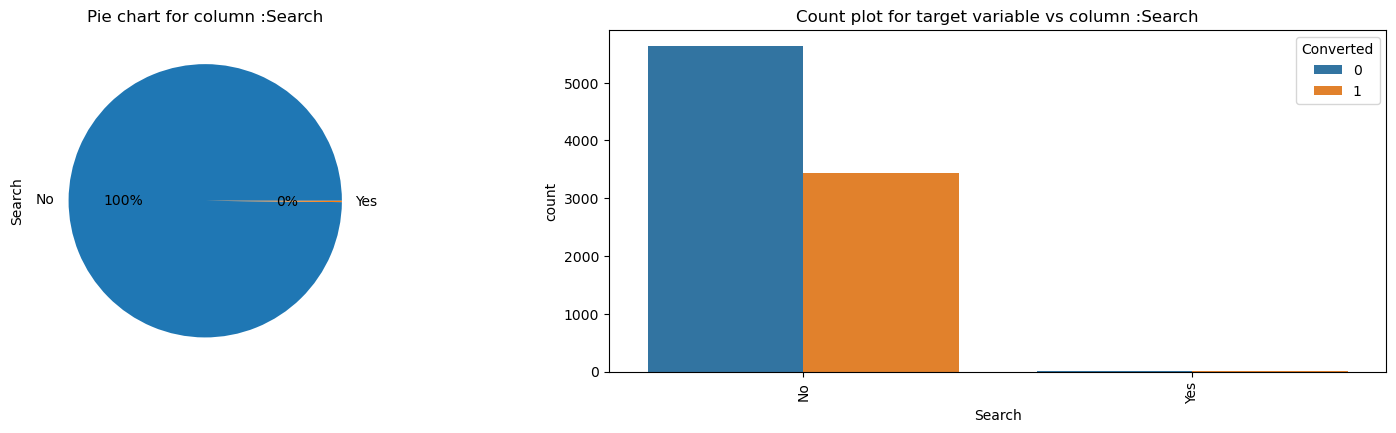

 Univariate Analysis for column :  Magazine


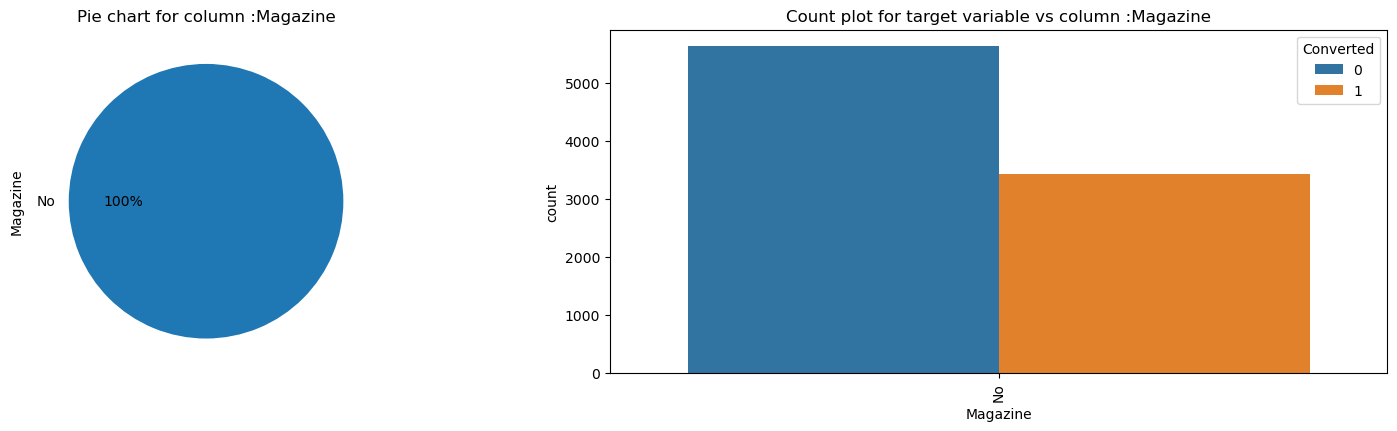

 Univariate Analysis for column :  Newspaper Article


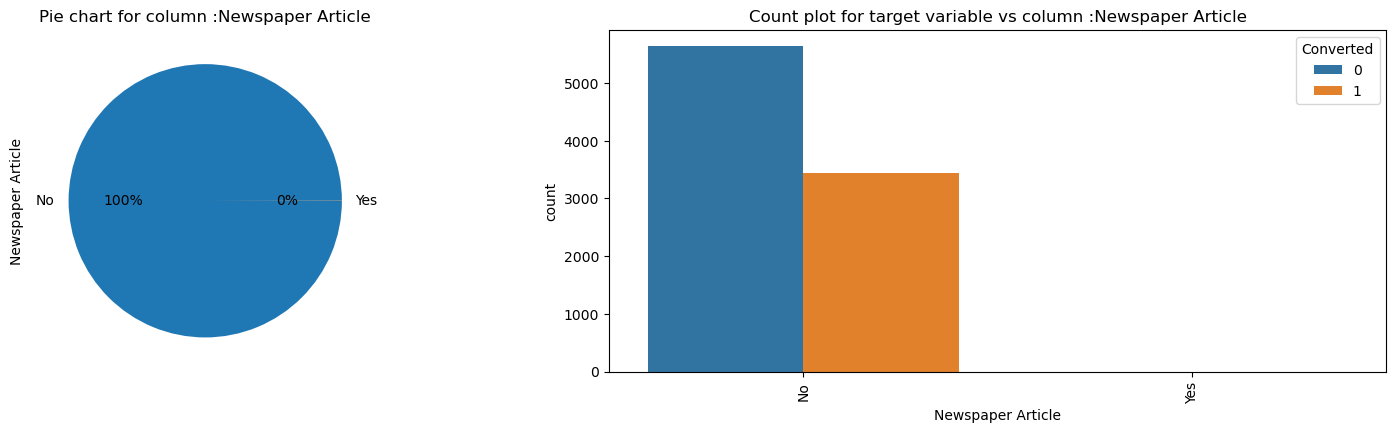

 Univariate Analysis for column :  X Education Forums


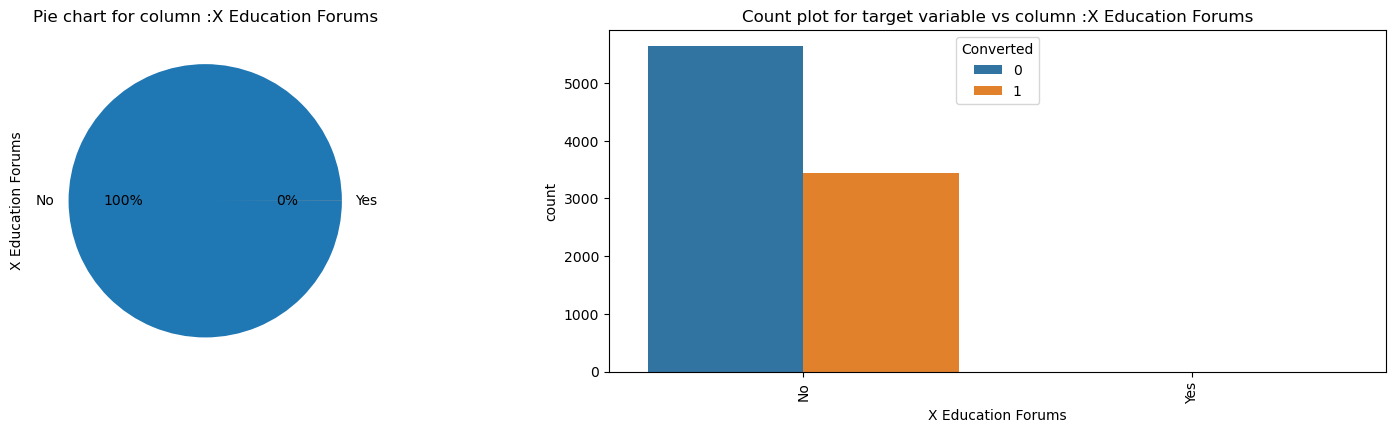

 Univariate Analysis for column :  Newspaper


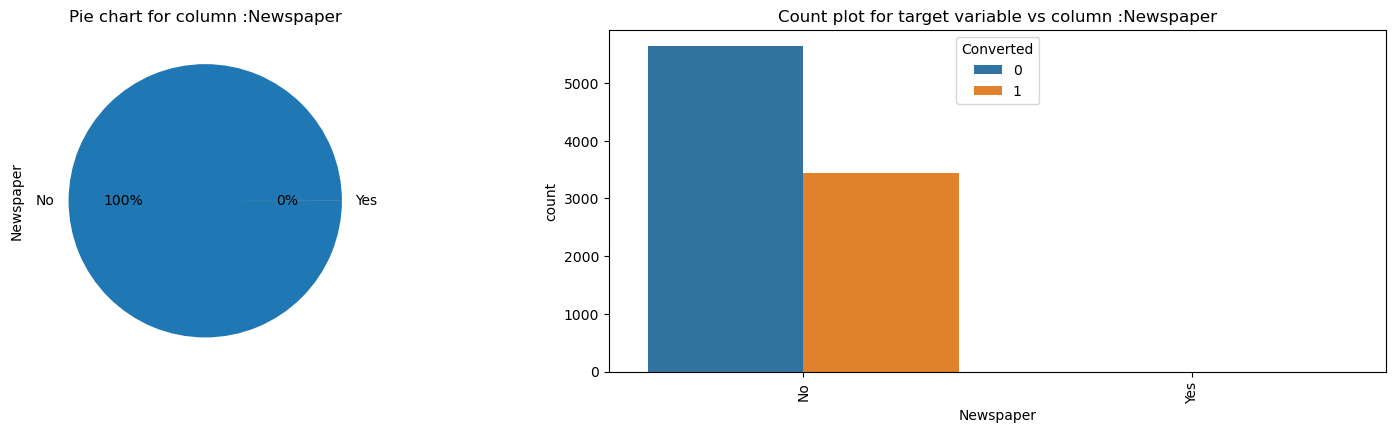

 Univariate Analysis for column :  Digital Advertisement


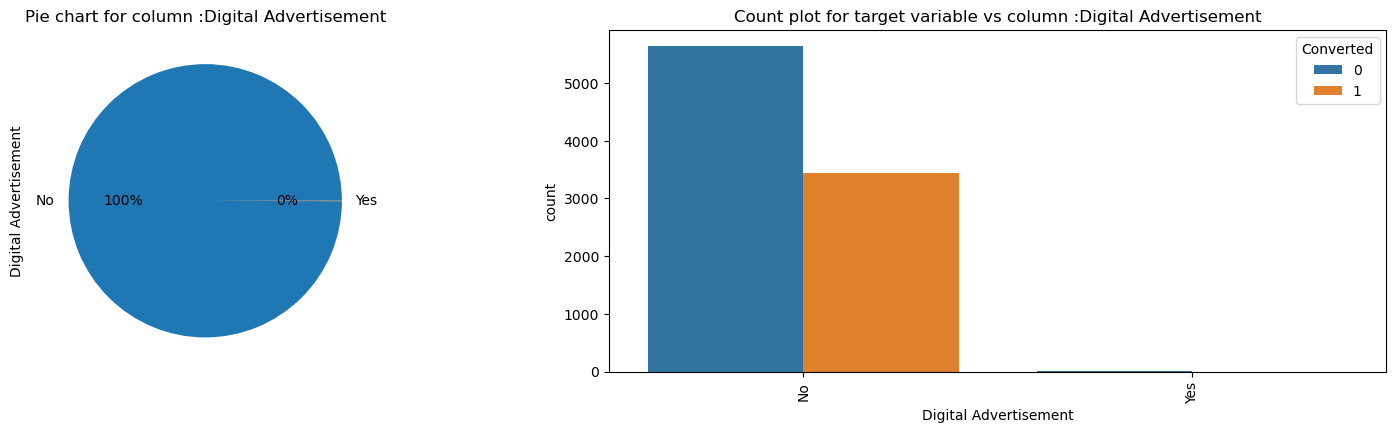

 Univariate Analysis for column :  Through Recommendations


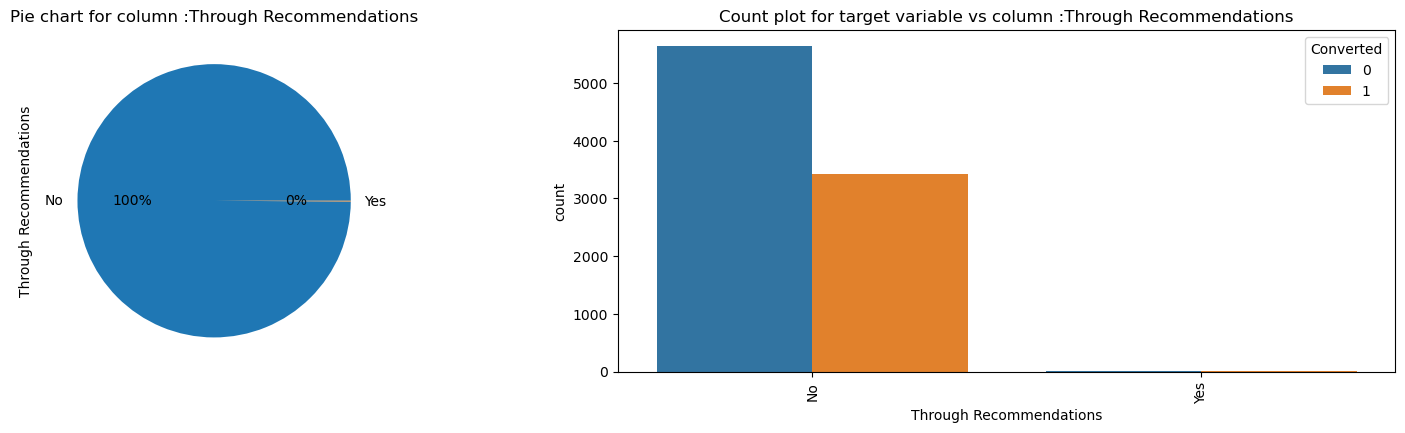

 Univariate Analysis for column :  Receive More Updates About Our Courses


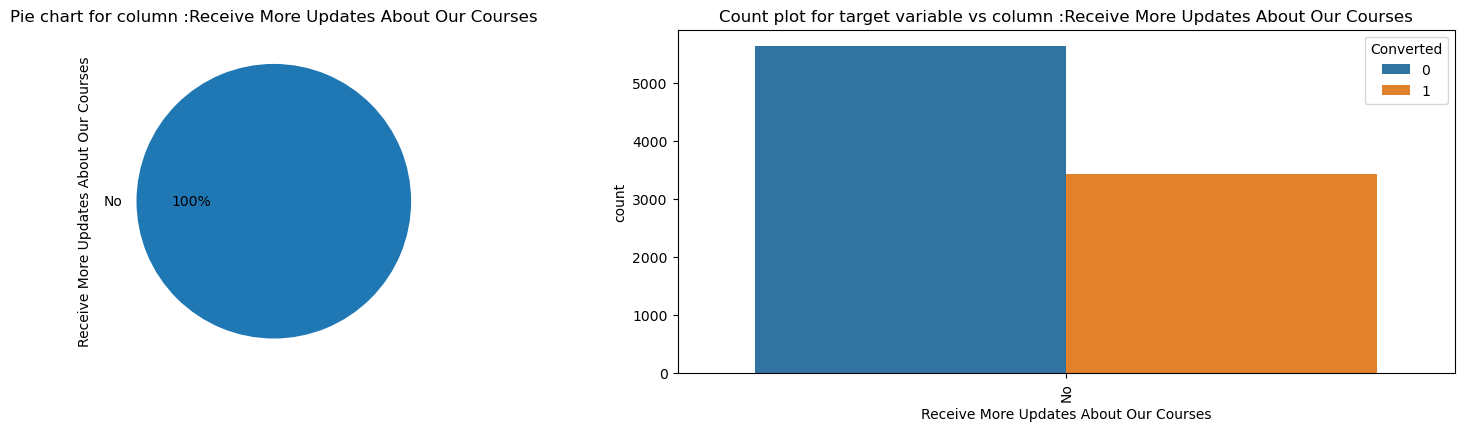

 Univariate Analysis for column :  Update me on Supply Chain Content


 Univariate Analysis for column :  Get updates on DM Content


 Univariate Analysis for column :  I agree to pay the amount through cheque


 Univariate Analysis for column :  A free copy of Mastering The Interview


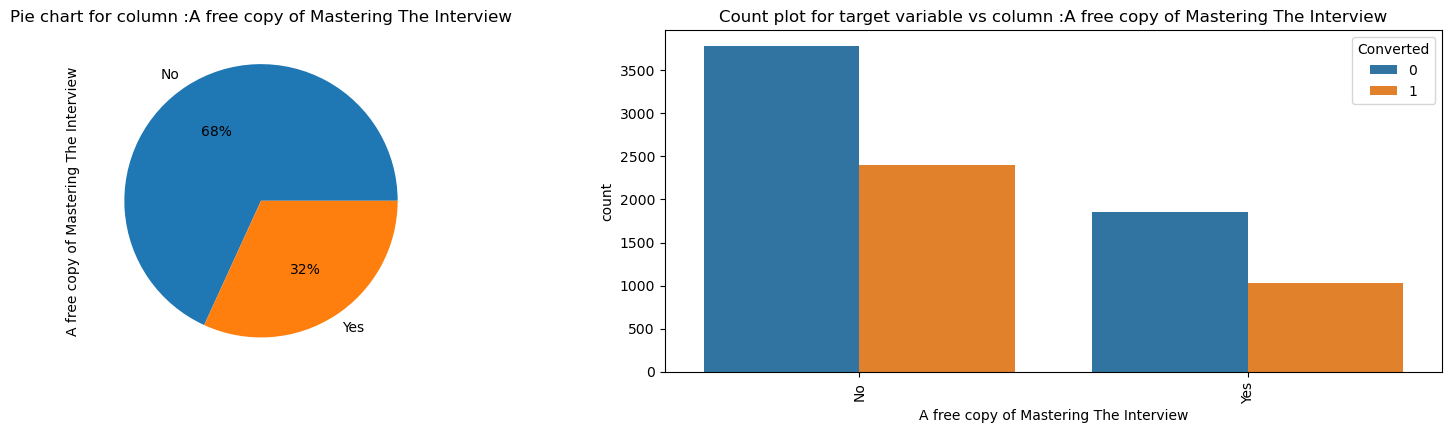

 Univariate Analysis for column :  Last Notable Activity


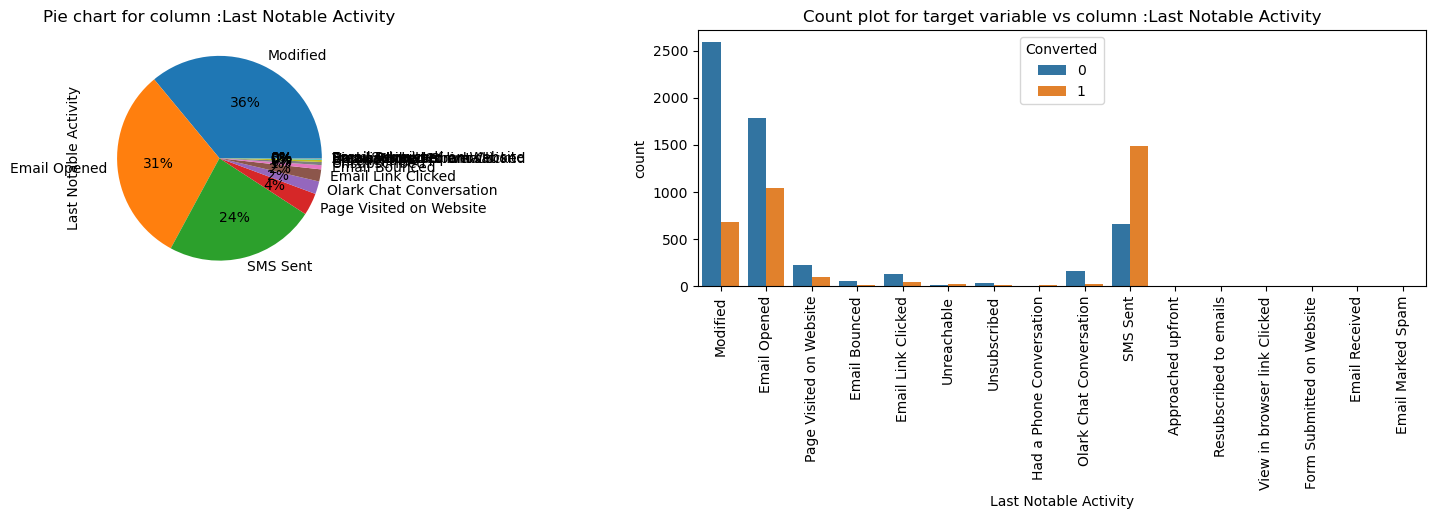

In [22]:
# Creating Pie and Count Plots for all the categorical variables
for col in var_cat:
    print(" Univariate Analysis for column : ", col)
    uni_plot(leads, leads_tgt0, leads_tgt1, col)
    print("========================================================================================================")

### We see that for the following columns only one value corresponds to almost 100% of values. 
'Do Not Call', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque',


- These columns do not add much value and can be dropped

In [23]:
leads = leads.drop(['Do Not Call', 'What matters most to you in choosing a course', 'Search', 'Magazine', 
                    'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 
                    'Through Recommendations', 'Receive More Updates About Our Courses', 
                    'Update me on Supply Chain Content', 'Get updates on DM Content', 
                    'I agree to pay the amount through cheque'], axis = 1)

### Observations on each of the columns  in details and making necessary changes

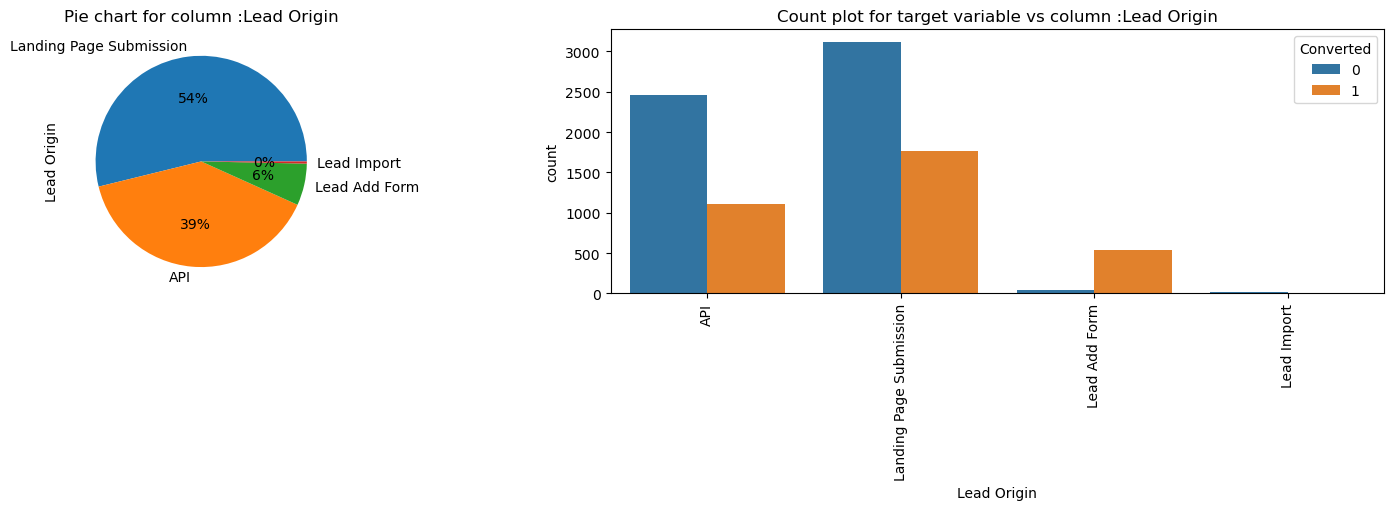

In [24]:
# analyzing Lead Origin
uni_plot(leads, leads_tgt0, leads_tgt1, 'Lead Origin')

- Lead Origin appears important field, also Lead Add Form happens to have the highest conversion rate. These are the hottest leads which have much higher probability of conversion
- this is followed by API and Landing Page Submission
- Lead Import has negligilbe count

In [25]:
# analyzing Lead Source
# from the intial Graphs we see that there are multiple values which have negligible count and these could be grouped together

In [26]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [27]:
# There are many small categories which can be clubbed as others (tagging all categories less than 100 as Other_cat)
# There are typos which - Google vs google etc
# solving of these
leads['Lead Source'] = leads['Lead Source'].replace(['Facebook','bing','Click2call', 'Press_Release', 'Social Media', 'Live Chat',
                                                     'youtubechannel','testone' ,'Pay per Click Ads', 'welearnblog_Home',
                                                     'WeLearn', 'blog', 'NC_EDM'], 'Other_cat')


leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')


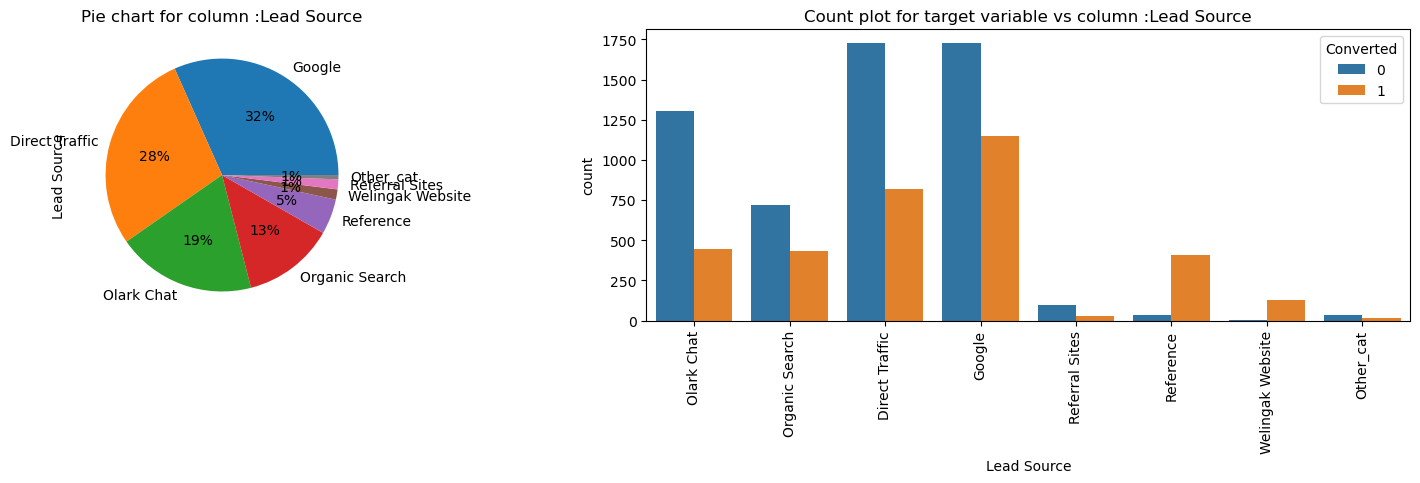

In [28]:
# analyzing Lead Source again
uni_plot(leads, leads_tgt0, leads_tgt1, 'Lead Source')

- Conversion Rate is highest for Lead Source - Welingak Websit and Reference. This could be an important input as we plan to maximize Conversion Rates 
- top 3 lead generatoring sources are - Google, Direct Traffic and Olark Chat

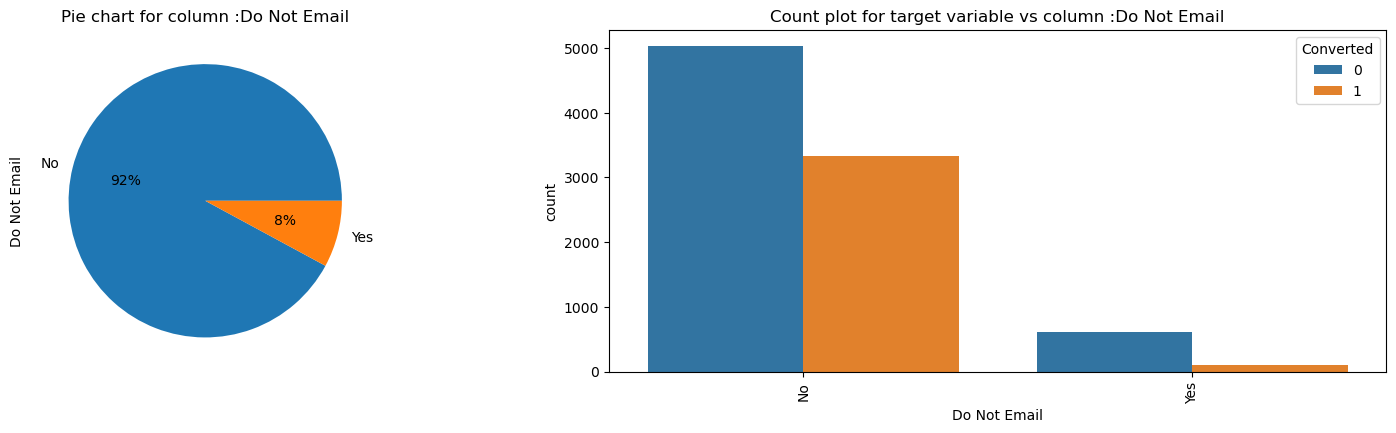

In [29]:
# analyzing Do Not Email
uni_plot(leads, leads_tgt0, leads_tgt1, 'Do Not Email')

- Only 8% Prospect have opted for Do not Email.
- there are no significat observations wrt conversion rates here

In [30]:
# understanding Column - Last Activity
# from the graphs we saw that there are multiple small categories which have negligible counts. These can be grouped together

In [31]:
# values counts for - Last Activity
leads['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [32]:
# Retagging the values with low count and grouping them as Other_Act
# Selectiong values lees than 90 as Others here

leads['Last Activity'] = leads['Last Activity'].replace(['Unsubscribed','Had a Phone Conversation','View in browser link Clicked',
                                                     'Approached upfront', 'Email Received', 'Email Marked Spam',
                                                     'Visited Booth in Tradeshow','Resubscribed to emails'], 'Other_Act')

In [33]:
# Replotting Values
uni_plot(leads, leads_tgt0, leads_tgt1, 'Last Activity')

- SMS sent has highest conversion rate followed by Email Opened
- Top 3 activities - Email Opened, SMS Sent, Olark Chat Conversation

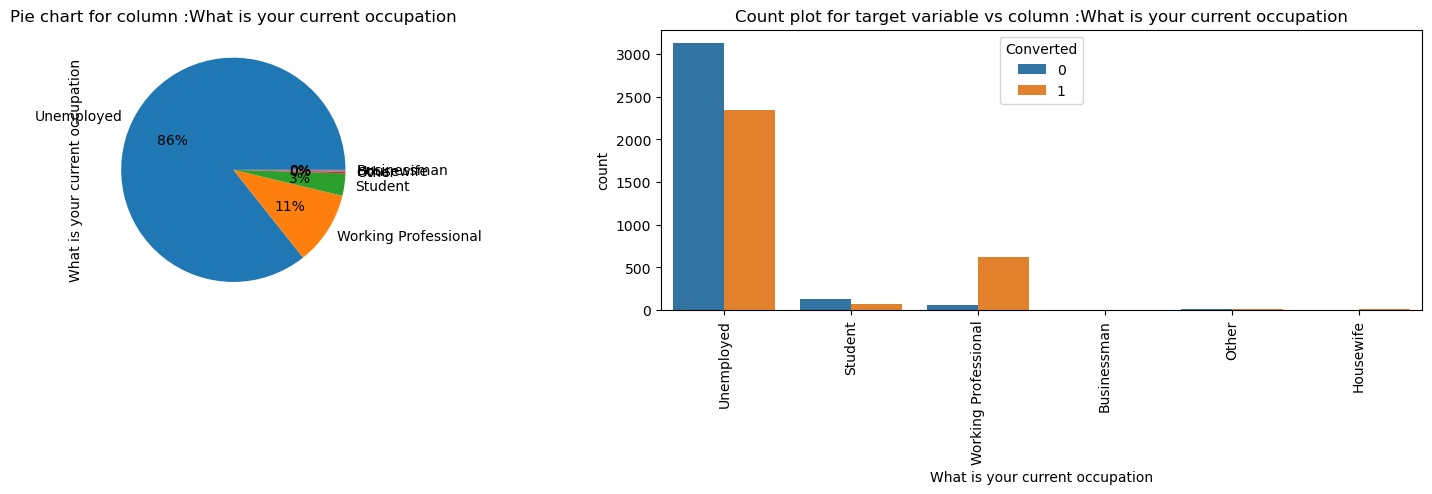

In [34]:
# Analyzing the variable - What is your current occupation
uni_plot(leads, leads_tgt0, leads_tgt1, 'What is your current occupation')

- Maximum values are Unemployed - 86%
- Working Professional have very high conversion rate
- There are many NULLs, now 86% of the Occupation is Unemployed. So Nulls can be replaced with Unemployed

In [35]:
# Tagging Null values are Unemployed
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.NaN, 'Unemployed')

In [36]:
# Re visiting the data graphs after making changes
uni_plot(leads, leads_tgt0, leads_tgt1, 'What is your current occupation')

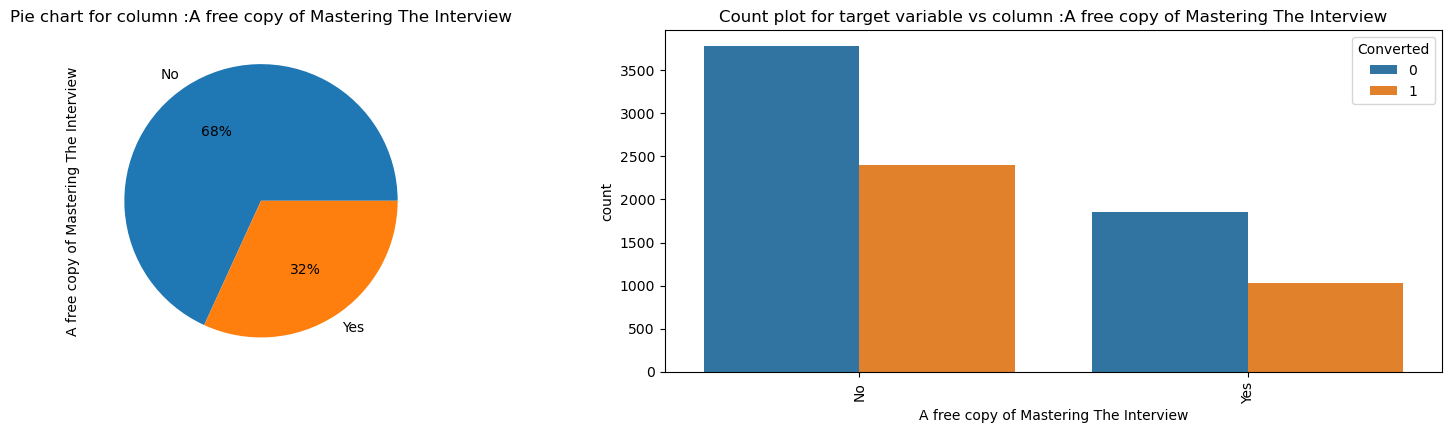

In [37]:
# Understanding column - A free copy of Mastering The Interview in detail
uni_plot(leads, leads_tgt0, leads_tgt1, 'A free copy of Mastering The Interview')

- 68% Leads do no want A free copy of Mastering The Interview
- Further, we do not see a reason much difference in the Conversion rates. Across No and Yes values
- The data suggested not specific importance of this column and it can be removed

In [38]:
# dropping - A free copy of Mastering The Interview
leads = leads.drop(['A free copy of Mastering The Interview'], axis = 1)

In [39]:
# From the Graphs we saw that column - Last Notable Activity has many values with negligible count. These can be grouped

In [40]:
# Viewing Value Count for - Last Notable Activity
leads['Last Notable Activity']. value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [41]:
# Tagging cateories with count less than 60 as Other_Act
leads['Last Notable Activity']=leads['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable',
                                                                      'Had a Phone Conversation', 'Email Marked Spam',
                                                                       'Approached upfront', 'Resubscribed to emails',
                                                                      'View in browser link Clicked',
                                                                      'Form Submitted on Website',
                                                                      'Email Received'],'Other_Act')

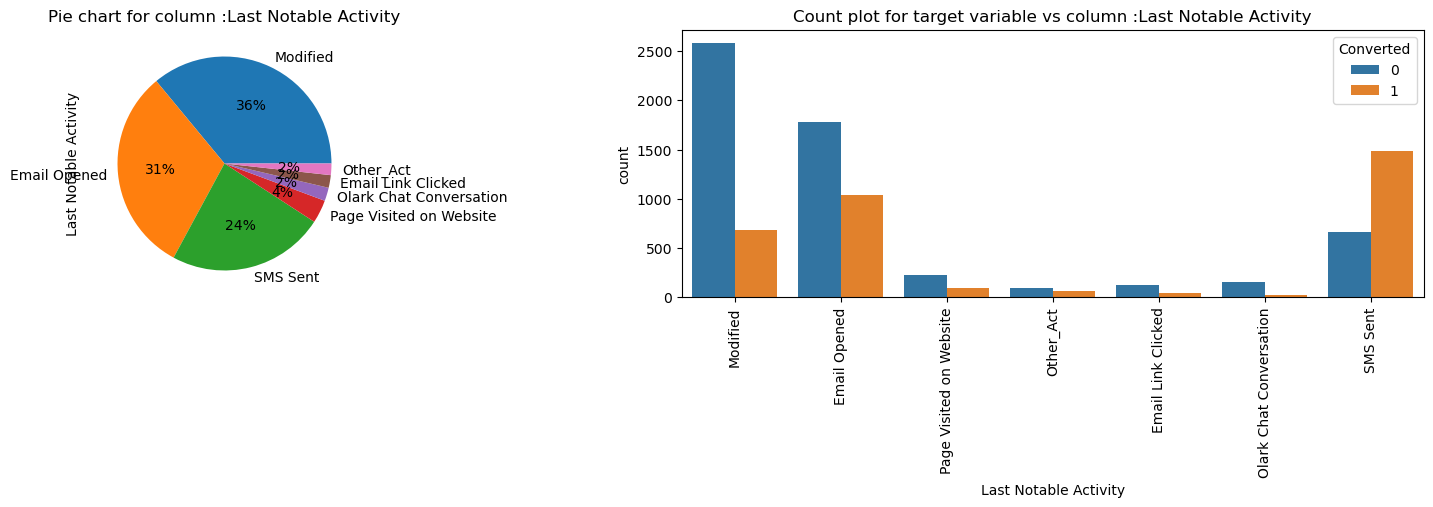

In [42]:
# Re visualizing the data again
uni_plot(leads, leads_tgt0, leads_tgt1, 'Last Notable Activity')

- Top 3 Last Notable Activity are - Modified, Email Opened and SMS Sent
- SMS Sent has the highest Conversion Rate and this can be an important input

In [43]:
# recheck missing values
leads.isnull().sum()

Prospect ID                           0
Lead Number                           0
Lead Origin                           0
Lead Source                           0
Do Not Email                          0
Converted                             0
TotalVisits                           0
Total Time Spent on Website           0
Page Views Per Visit                  0
Last Activity                         0
Country                            2296
What is your current occupation       0
Last Notable Activity                 0
dtype: int64

#### Understanding column - Country
- from inital graphs we see that more than 96% of the values in Country column is INDIA
further , there are many missing values as well, Keeping this column will not add much value to our data. We can drop this


In [44]:
leads= leads.drop(['Country'], axis = 1)

In [45]:
leads.shape

(9074, 12)

### Analyzing Numerical Varaibles


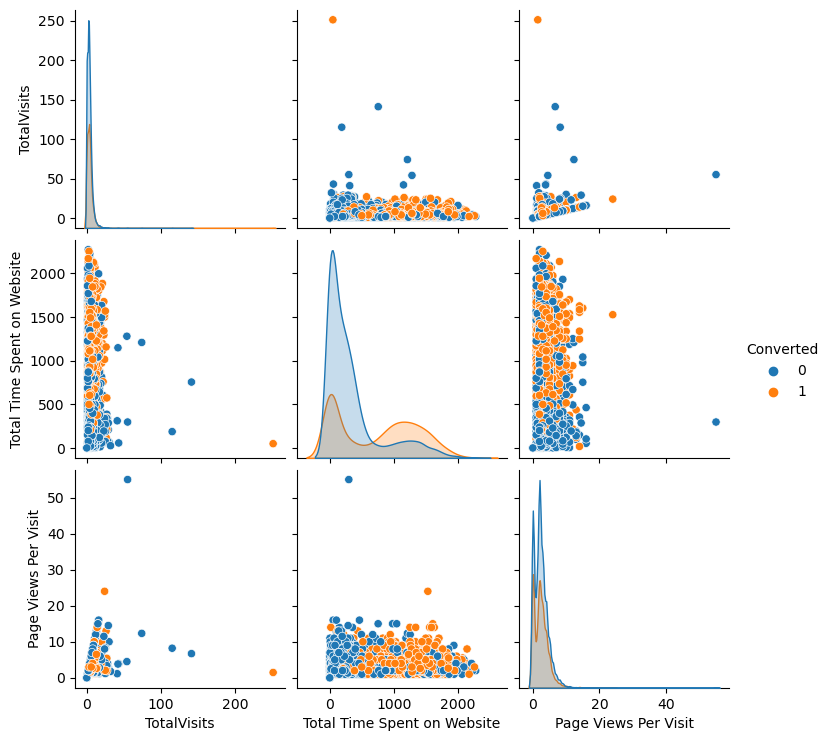

In [46]:
sns.pairplot(leads[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit', 'Converted']], diag_kind='kde', hue='Converted')
plt.show()

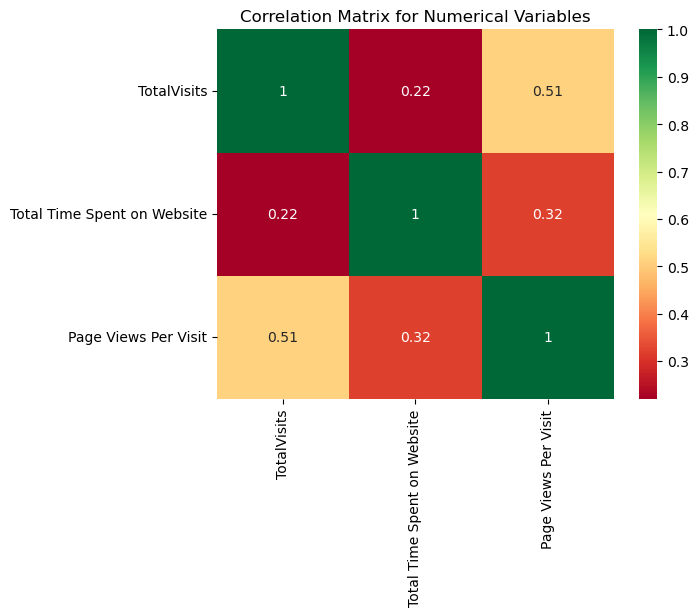

In [47]:
sns.heatmap(leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].corr(), annot=True, cmap="RdYlGn")
plt.title( "Correlation Matrix for Numerical Variables")
plt.show()

- We see very high correlation between Total Visits and Page Views Per Visit
- We will handle this in the Model Building phase via VIF

In [48]:
# Creating Box Plot on Numerical Variable - TotalVisits
sns.boxplot(leads['TotalVisits'])
plt.show()

- we see very high outlier values which need to be removed

In [49]:
# Getting Quantile values to see the spread of data especially in the higher extreme values
t_vst_quantiles = leads['TotalVisits'].quantile([0.05, 0.1, 0.25, 0.75, 0.90, 0.95, 0.99, 0.995, 0.999, 1])
print(t_vst_quantiles)

0.050      0.000
0.100      0.000
0.250      1.000
0.750      5.000
0.900      7.000
0.950     10.000
0.990     17.000
0.995     21.000
0.999     31.854
1.000    251.000
Name: TotalVisits, dtype: float64


In [50]:
# Keeping values less than 20 as it covers more than 99% data
leads= leads[leads['TotalVisits']<=20]
leads.shape

(9027, 12)

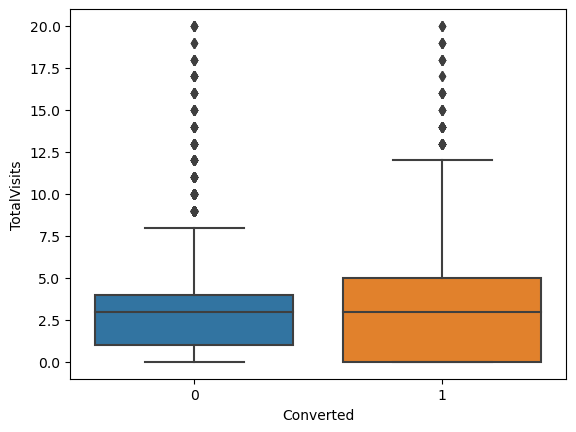

In [51]:
# Box plot to view the spead of values for Not Converted and Converted Leads
sns.boxplot(x='Converted', y='TotalVisits', data =leads)
plt.show()

- The median of TotalVisits is similar for Non Converted and Converted Prospects
- Inter Quartile Range is much higher for Converted Prospects

Also, we do not see any high outliers and the data is more of less in continous pattern

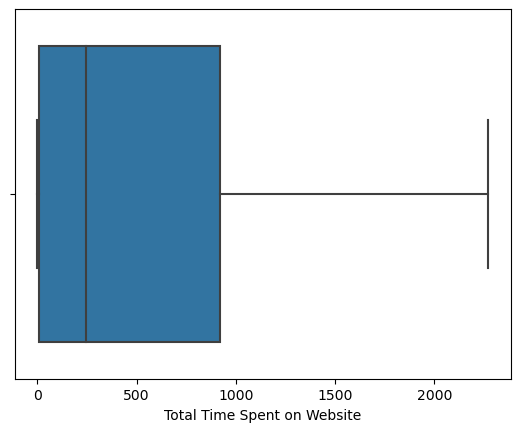

In [52]:
# Creating Box Plot for - Total Time Spent on Website
sns.boxplot(leads['Total Time Spent on Website'])
plt.show()

- we do not see any outliers and there is not need to drop outlier here

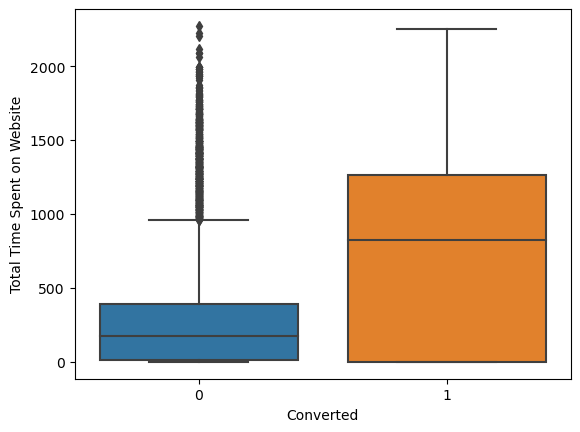

In [53]:
# Creating a BOX plot for - 'Total Time Spent on Website' Non Converted vs Converted Prospects
sns.boxplot(x='Converted', y='Total Time Spent on Website', data =leads)
plt.show()

- Non Converted Prospects have much lower Median and IQR
- ON other hand, Converted Prospects have much high Median and IQR. THis indicates that CMs who spend higher time on website have higher changes of conversion

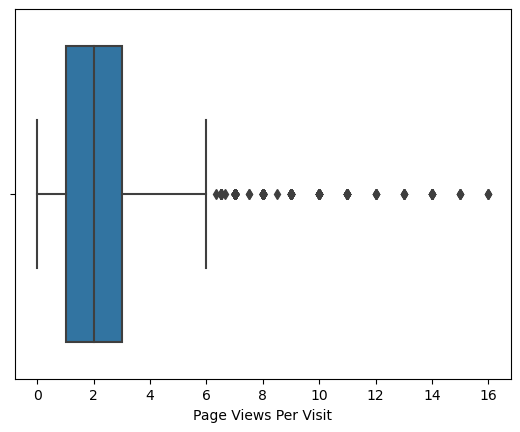

In [54]:
# Box Plot for variable - Page Views Per Visit
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

In [55]:
# Getting Quantile values to see the spread of data especially in the higher extreme values
t_pg_quantiles = leads['Page Views Per Visit'].quantile([0.05, 0.1, 0.25, 0.75, 0.90, 0.95, 0.99, 0.995, 0.999, 1])
print(t_pg_quantiles)

0.050     0.0
0.100     0.0
0.250     1.0
0.750     3.0
0.900     5.0
0.950     6.0
0.990     9.0
0.995    10.0
0.999    14.0
1.000    16.0
Name: Page Views Per Visit, dtype: float64


- the outliers are more of less continuous till 99% value of 9. So we can drop the last 1% data here 

In [56]:
# Keeping values less than 10 as it covers more than 99% data
leads= leads[leads['Page Views Per Visit']<=10]
leads.shape

(8983, 12)

In [57]:
# Creating box plot for - Page Views Per Visit to view Not Converted vs Converted Prospects
sns.boxplot(x='Converted', y='Page Views Per Visit', data =leads)

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

- There is no differnece in the median for Not Converted vs Converted Prospects
- Conveted prospects have higher IQR

In [58]:
# Reviewing Data Head
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email  Converted  TotalVisits  \
0      Olark Chat           No          0          0.0   
1  Organic Search           No          0          5.0   
2  Direct Traffic           No          1          2.0   
3  Direct Traffic           No          0          1.0   
4          Google           No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  What is your current occupation Last Notable Activity  
0                      Unemployed              Modified  
1                      Unemployed          Email Opened  
2                         Student          Email Opened  
3                      Unemployed              Modified  
4                      Unemployed              Modified

# Feature Engineering
- making changes to features - creating dummy variables, converting Categorical variables to Numeric etc.

In [59]:
# Changing categorical features to Numerical - Yes to 1 and No to 0
leads['Do Not Email']= leads['Do Not Email'].replace(['Yes'], 1)
leads['Do Not Email']= leads['Do Not Email'].replace(['No'], 0)

In [60]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8983 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      8983 non-null   object 
 1   Lead Number                      8983 non-null   int64  
 2   Lead Origin                      8983 non-null   object 
 3   Lead Source                      8983 non-null   object 
 4   Do Not Email                     8983 non-null   int64  
 5   Converted                        8983 non-null   int64  
 6   TotalVisits                      8983 non-null   float64
 7   Total Time Spent on Website      8983 non-null   int64  
 8   Page Views Per Visit             8983 non-null   float64
 9   Last Activity                    8983 non-null   object 
 10  What is your current occupation  8983 non-null   object 
 11  Last Notable Activity            8983 non-null   object 
dtypes: float64(2), int64

In [61]:
# Creating dummy Variables for remaining categorical variable with multiple values

var_dum= pd.get_dummies(leads[['Lead Origin','Lead Source', 'Last Activity', 
                                'What is your current occupation', 'Last Notable Activity']], drop_first=True)
var_dum.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
0                        0                   0                       1   
1                        0                   0                       0   
2                        0                   0                       0   
3                        0                   0                       0   
4                        0                   1                       0   

   Lead Source_Organic Search  Lead Source_Other_cat  Lead Source_Reference  \
0                           0                      0                      0   
1                           1                      0                      0   
2                           0                      0                      0   
3                           0                      0                      0   
4                           0                      0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        0   
4                           0                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other_Act  \
0                                      0                        0   
1                                      0                        0   
2                                      0                        0   
3                                      0                        0   
4                                      0                        0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Last Activity_Unreachable  What is your current occupation_Housewife  \
0                          0                                          0   
1                          0                                          0   
2                          0                                          0   
3                          1                                          0   
4                          0                                          0   

   What is your current occupation_Other  \
0                                      0   
1                                      0   
2                           

In [62]:
# Concatenating with main dataframe
leads1= pd.concat([leads, var_dum], axis=1)

In [63]:
# Viewging the data head
leads1.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Converted  TotalVisits  \
0      Olark Chat             0          0          0.0   
1  Organic Search             0          0          5.0   
2  Direct Traffic             0          1          2.0   
3  Direct Traffic             0          0          1.0   
4          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  What is your current occupation Last Notable Activity  \
0                      Unemployed              Modified   
1                      Unemployed          Email Opened   
2                         Student          Email Opened   
3                      Unemployed              Modified   
4                      Unemployed              Modified   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
0                        0                   0                       1   
1                        0                   0                       0   
2                        0                   0                       0   
3                        0                   0                       0   
4                        0                   1                       0   

   Lead Source_Organic Search  Lead Source_Other_cat  Lead Source_Reference  \
0                           0                      0                      0   
1                           1                      0                      0   
2                           0                      0                      0   
3                           0                      0                      0   
4                           0                      0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   

In [64]:
# Dropping the original Categorical columns

leads1= leads1.drop(['Lead Origin','Lead Source', 'Last Activity', 
                                'What is your current occupation', 'Last Notable Activity'], axis=1)

In [65]:
leads1.shape

(8983, 37)

In [156]:
leads1.head()

Prospect ID  Lead Number  Do Not Email  Converted  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737             0          0   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728             0          0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727             0          1   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719             0          0   
4  3256f628-e534-4826-9d63-4a8b88782852       660681             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0         0.00                            0                  0.00   
1         5.00                          674                  2.50   
2         2.00                         1532                  2.00   
3         1.00                          305                  1.00   
4         2.00                         1428                  1.00   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
0                        0                   0                       1   
1                        0                   0                       0   
2                        0                   0                       0   
3                        0                   0                       0   
4                        0                   1                       0   

   Lead Source_Organic Search  Lead Source_Other_cat  Lead Source_Reference  \
0                           0                      0                      0   
1                           1                      0                      0   
2                           0                      0                      0   
3                           0                      0                      0   
4                           0                      0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        0   
4                           0                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other_Act  \
0                                      0                        0   
1                                      0                        0   
2                                      0                        0   
3                                      0                        0   
4                                      0                        0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1      

In [66]:
# Preparing data for Modelling
X = leads1.drop(['Prospect ID','Lead Number', 'Converted'], axis=1)

y = leads1['Converted']

In [67]:
# importing train_test_split for creating Training and Testing Datasets
from sklearn.model_selection import train_test_split

In [68]:
# Creating Training and Test Data sets

# We have used the option stratify = y to ensure that training and test data has proportionate values of Output variable y
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100, stratify=y)

### Feature Scaling
- We will use StandardScaler to fit and transform only the training data
- The same scaler will be used to only transform the test data as we do not want it to learn about test data

In [69]:
# Importing StandardScaler to scale Numerical variables
from sklearn.preprocessing import StandardScaler

In [70]:
# Instantiating StandardScaler
scaler = StandardScaler()

# Scaling only numerical features
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]= scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
5491             0     0.572234                    -0.370985   
3850             0    -1.058274                    -0.890176   
3692             0    -0.079970                     0.933413   
6920             0    -0.406071                     1.390227   
1432             0     2.528843                     1.043489   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
5491              0.099392                                    1   
3850             -1.203491                                    0   
3692             -0.421761                                    1   
6920             -0.161185                                    1   
1432              0.229680                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Google  \
5491                          0                        0                   0   
3850                          0                        0                   0   
3692                          0                        0                   0   
6920                          0                        0                   0   
1432                          0                        0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  \
5491                       0                           0   
3850                       1                           0   
3692                       0                           0   
6920                       0                           0   
1432                       0                           1   

      Lead Source_Other_cat  Lead Source_Reference  \
5491                      0                      0   
3850                      0                      0   
3692                      0                      0   
6920                      0                      0   
1432                      0                      0   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
5491                           0                             0   
3850                           0                             0   
3692                           0                             0   
6920                           0                             0   
1432                           0                             0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
5491                            0                                 0   
3850                            0                                 0   
3692                            0                                 0   
6920                            0                                 0   
1432                            0                                 0   

      Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
5491                           0                                        0   
3850                           0                                        0   
3692                           1                                        0   
6920                           1                                        0   
1432                           1                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Other_Act  \
5491                                      0                        0   
3850                                      0                        0   
3692                                      0                        0   
6920                                      0                        0   
1432                                      0                        0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
5491                                      0                       1   
3850                                      0                       1   
3692                                      0                       0   
6920                                      0    

In [71]:
# Checking the skewness in data by checking % of Converted
converted = (sum(leads1['Converted'])/len(leads1['Converted'].index))*100
print(converted)

37.82700656796171


- We see that around 38% of prospects on average go ahead with the purchase

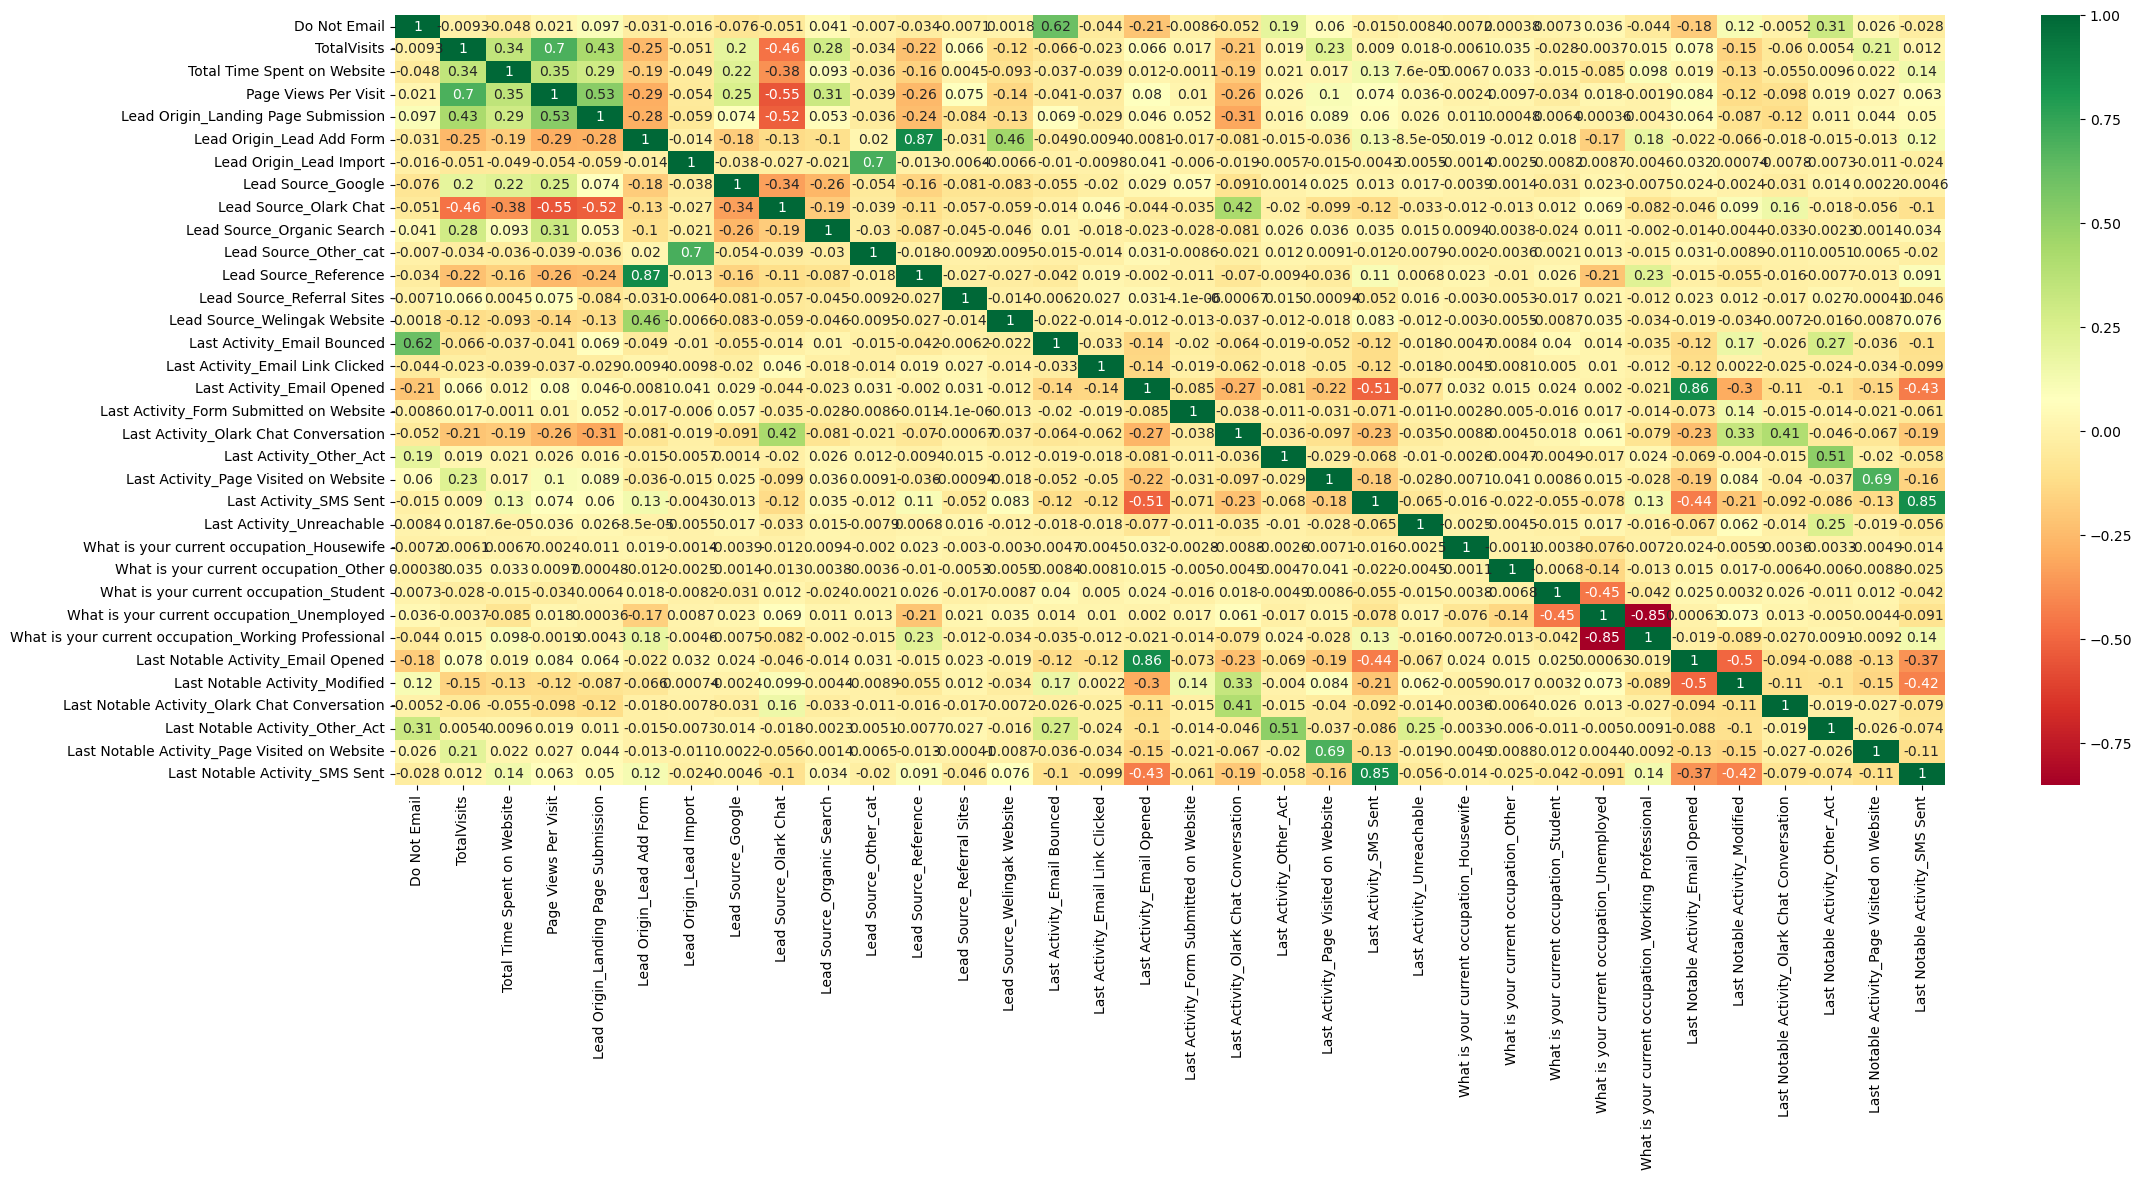

In [72]:
# Understanding Correlations between variables
plt.figure(figsize = (25,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True, cmap="RdYlGn")
plt.show()

- We see some darker shades which signifies high correlation between variables
- We will address these in our modelling exercise using VIF scores

### Building Initial model

In [73]:
# Importing and instantiating LogisticRegression Model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [74]:
# Importing StatsModel API
import statsmodels.api as sm

# Logistic regression model
log_m1 = sm.GLM(y_train,X_train, family = sm.families.Binomial())
log_m1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2595.8
Date:                Tue, 18 Jul 2023   Deviance:                       5191.5
Time:                        15:25:20   Pearson chi2:                 6.31e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3940
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Do Not Email                                            -1.4072      0.216     -6.520      0.000      -1.830      -0.984
TotalVisits                                              0.1798      0.050      3.567      0.000       0.081       0.279
Total Time Spent on Website                              1.1141      0.041     27.346      0.000       1.034       1.194
Page Views Per Visit                                    -0.1073      0.056     -1.899      0.058      -0.218       0.003
Lead Origin_Landing Page Submission                     -0.2072      0.103     -2.014      0.044      -0.409      -0.006
Lead Origin_Lead Add Form                               23.0526   1.76e+04      0.001      0.999   -3.44e+04    3.45e+04
Lead Origin_Lead Import                                  0.2677      0.896      0.299      0.765      -1.489       2.024
Lead Source_Google                                       0.2642      0.098      2.702      0.007       0.073       0.456
Lead Source_Olark Chat                                   1.2505      0.156      7.995      0.000       0.944       1.557
Lead Source_Organic Search                               0.1849      0.129      1.429      0.153      -0.069       0.439
Lead Source_Other_cat                                    0.4638      0.660      0.702      0.482      -0.830       1.758
Lead Source_Reference                                  -19.0162   1.76e+04     -0.001      0.999   -3.45e+04    3.44e+04
Lead Source_Referral Sites                              -0.2837      0.354     -0.802      0.423      -0.977       0.410
Lead Source_Welingak Website                           -16.6214   1.76e+04     -0.001      0.999   -3.45e+04    3.44e+04
Last Activity_Email Bounced                             -0.5590      0.495     -1.129      0.259      -1.529       0.412
Last Activity_Email Link Clicked                         0.6664      0.371      1.794      0.073      -0.061       1.394
Last Activity_Email Opened                               0.8224      0.233      3.533      0.000       0.366       1.279
Last Activity_Form Submitted on Website                  0.4779      0.381      1.255      0.209      -0.268       1.224
Last Activity_Olark Chat Conversation                   -0.4912      0.258     -1.904      0.057      -0.997       0.014
Last Activity_Other_Act                                  0.9303      0.473      1.969      0.049       0.004       1.856
Last Activity_Page Visited on Website                    0.1892      0.288      0.658      0.510      -0.374       0.753
Last Activity_SMS Sent                                   1.2080      0.236      5.125      0.000       0.746       1.670
Last Activity_Unreachable                                0

### Using RFE for feature selection
- There are so many variables and we will be using RFE to select the top 20 most significant variables

In [75]:
# Importing RFE
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select= 20)
rfe = rfe.fit(X_train, y_train)

In [76]:
rfe.support_

array([ True, False,  True, False, False,  True, False, False,  True,
       False,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True, False, False, False,  True, False,  True])

In [77]:
# List of all features, True means that the variable is selected
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 13),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 8),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 12),
 ('Lead Source_Other_cat', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 2),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 4),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Act', True, 1),
 ('Last Activity_Page Visited on Website', False, 11),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', True, 1),
 ('What is your current occupation_Ho

In [78]:
# Getting list of columns from RFE
col = X_train.columns[rfe.support_]

In [79]:
# List of varaibles which are not selected
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Other',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

## Building Model 2

In [80]:
# importing variance_inflation_factor to check multi collinearity in iterative models
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
# Creating X_train_rfe and X_train_iter (for multiple iterations) with RFE selected variables
X_train_rfe = X_train[col]
X_train_iter = X_train[col]

In [82]:
# Adding a constant to the model
X_train_lg2=sm.add_constant(X_train_iter)

log_m2 = sm.GLM(y_train,X_train_lg2, family = sm.families.Binomial())
res = log_m2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6267
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2616.3
Date:                Tue, 18 Jul 2023   Deviance:                       5232.6
Time:                        15:25:22   Pearson chi2:                 6.34e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3900
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [83]:
# Calculate the VIFs for Model
vif = pd.DataFrame()
X = X_train_iter
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                             Features    VIF
2                           Lead Origin_Lead Add Form  76.09
5                               Lead Source_Reference  59.70
6                        Lead Source_Welingak Website  17.72
12                             Last Activity_SMS Sent   7.14
16         What is your current occupation_Unemployed   6.94
19                     Last Notable Activity_SMS Sent   4.88
9                          Last Activity_Email Opened   3.92
10              Last Activity_Olark Chat Conversation   2.15
7                         Last Activity_Email Bounced   2.02
0                                        Do Not Email   1.94
3                              Lead Source_Olark Chat   1.83
18                    Last Notable Activity_Other_Act   1.72
17  What is your current occupation_Working Profes...   1.65
11                            Last Activity_Other_Act   1.59
1                         Total Time Spent on Website   1.32
8                    Las

In [84]:
# We see very high P value for -  Lead Origin_Lead Add Form
# we see very high VIF for - Lead Origin_Lead Add Form
# Basis high pvalue and VIF we will be removing - Lead Origin_Lead Add Form

X_train_iter = X_train_iter.drop(['Lead Origin_Lead Add Form'], axis = 1)

### Building Model 3

In [85]:
X_train_lg3=sm.add_constant(X_train_iter)

log_m3 = sm.GLM(y_train,X_train_lg3, family = sm.families.Binomial())
res = log_m3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6268
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2621.2
Date:                Tue, 18 Jul 2023   Deviance:                       5242.3
Time:                        15:25:22   Pearson chi2:                 6.35e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3891
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [86]:
# Calculate the VIFs for Model
vif = pd.DataFrame()
X = X_train_iter
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                             Features   VIF
11                             Last Activity_SMS Sent  7.14
15         What is your current occupation_Unemployed  6.93
18                     Last Notable Activity_SMS Sent  4.87
8                          Last Activity_Email Opened  3.92
9               Last Activity_Olark Chat Conversation  2.15
6                         Last Activity_Email Bounced  2.02
0                                        Do Not Email  1.94
2                              Lead Source_Olark Chat  1.83
17                    Last Notable Activity_Other_Act  1.72
16  What is your current occupation_Working Profes...  1.65
10                            Last Activity_Other_Act  1.59
1                         Total Time Spent on Website  1.32
7                    Last Activity_Email Link Clicked  1.25
4                               Lead Source_Reference  1.22
12                          Last Activity_Unreachable  1.19
14            What is your current occup

In [87]:
# We see very high P value for -  What is your current occupation_Housewife 
# we see very high VIF for - Last Activity_SMS Sent
# Basis pvalue we will be removing - What is your current occupation_Housewife 

X_train_iter = X_train_iter.drop(['What is your current occupation_Housewife'], axis = 1)

### Building Model 4

In [88]:
X_train_lg4=sm.add_constant(X_train_iter)

log_m4 = sm.GLM(y_train,X_train_lg4, family = sm.families.Binomial()) # Running model with new X_train
res = log_m4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6269
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2623.2
Date:                Tue, 18 Jul 2023   Deviance:                       5246.5
Time:                        15:25:23   Pearson chi2:                 6.35e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3887
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [89]:
# Calculate the VIFs for Model
vif = pd.DataFrame()
X = X_train_iter
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                             Features   VIF
11                             Last Activity_SMS Sent  7.13
14         What is your current occupation_Unemployed  6.90
17                     Last Notable Activity_SMS Sent  4.87
8                          Last Activity_Email Opened  3.89
9               Last Activity_Olark Chat Conversation  2.15
6                         Last Activity_Email Bounced  2.02
0                                        Do Not Email  1.93
2                              Lead Source_Olark Chat  1.83
16                    Last Notable Activity_Other_Act  1.72
15  What is your current occupation_Working Profes...  1.64
10                            Last Activity_Other_Act  1.59
1                         Total Time Spent on Website  1.32
7                    Last Activity_Email Link Clicked  1.25
4                               Lead Source_Reference  1.22
12                          Last Activity_Unreachable  1.19
13            What is your current occup

In [90]:
# We see very high P value for -  Last Activity_Unreachable
# we see very high VIF for - Last Activity_SMS Sent
# Basis pvalue we will be removing - Last Activity_Unreachable

X_train_iter = X_train_iter.drop(['Last Activity_Unreachable'], axis = 1)

### Building Model 5

In [91]:
X_train_lg5=sm.add_constant(X_train_iter)

log_m5 = sm.GLM(y_train,X_train_lg5, family = sm.families.Binomial())
res = log_m5.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6270
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2623.6
Date:                Tue, 18 Jul 2023   Deviance:                       5247.2
Time:                        15:25:23   Pearson chi2:                 6.36e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3886
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [92]:
# Calculate the VIFs for Model
vif = pd.DataFrame()
X = X_train_iter
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                             Features   VIF
11                             Last Activity_SMS Sent  6.99
13         What is your current occupation_Unemployed  6.49
16                     Last Notable Activity_SMS Sent  4.87
8                          Last Activity_Email Opened  3.73
9               Last Activity_Olark Chat Conversation  2.10
6                         Last Activity_Email Bounced  1.96
0                                        Do Not Email  1.93
2                              Lead Source_Olark Chat  1.83
14  What is your current occupation_Working Profes...  1.61
15                    Last Notable Activity_Other_Act  1.56
10                            Last Activity_Other_Act  1.52
1                         Total Time Spent on Website  1.32
7                    Last Activity_Email Link Clicked  1.24
4                               Lead Source_Reference  1.22
12            What is your current occupation_Student  1.14
5                        Lead Source_Wel

In [93]:
# We see very high P value for -  Last Activity_Other_Act
# we see very high VIF for - Last Activity_SMS Sent
# Basis pvalue we will be removing - Last Activity_Other_Act

X_train_iter = X_train_iter.drop(['Last Activity_Other_Act'], axis = 1)

### Building Model 6

In [94]:
X_train_lg6=sm.add_constant(X_train_iter)

log_m6 = sm.GLM(y_train,X_train_lg6, family = sm.families.Binomial())
res = log_m6.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6271
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2624.3
Date:                Tue, 18 Jul 2023   Deviance:                       5248.7
Time:                        15:25:23   Pearson chi2:                 6.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3885
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [95]:
# Calculate the VIFs for Model
vif = pd.DataFrame()
X = X_train_iter
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                             Features   VIF
10                             Last Activity_SMS Sent  6.92
12         What is your current occupation_Unemployed  6.36
15                     Last Notable Activity_SMS Sent  4.87
8                          Last Activity_Email Opened  3.66
9               Last Activity_Olark Chat Conversation  2.07
0                                        Do Not Email  1.87
2                              Lead Source_Olark Chat  1.83
6                         Last Activity_Email Bounced  1.79
13  What is your current occupation_Working Profes...  1.59
1                         Total Time Spent on Website  1.31
7                    Last Activity_Email Link Clicked  1.23
4                               Lead Source_Reference  1.22
14                    Last Notable Activity_Other_Act  1.18
11            What is your current occupation_Student  1.13
5                        Lead Source_Welingak Website  1.05
3                               Lead Sou

In [96]:
# We see very high P value for -  Last Activity_Email Link Clicked
# we see very high VIF for - Last Activity_SMS Sent
# Basis pvalue we will be removing - Last Activity_Email Link Clicked

X_train_iter = X_train_iter.drop(['Last Activity_Email Link Clicked'], axis = 1)

### Building Model 7

In [97]:
X_train_lg7=sm.add_constant(X_train_iter)

log_m7 = sm.GLM(y_train,X_train_lg7, family = sm.families.Binomial())
res = log_m7.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2625.8
Date:                Tue, 18 Jul 2023   Deviance:                       5251.6
Time:                        15:25:24   Pearson chi2:                 6.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3882
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [98]:
# Calculate the VIFs for Model
vif = pd.DataFrame()
X = X_train_iter
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                             Features   VIF
9                              Last Activity_SMS Sent  6.55
11         What is your current occupation_Unemployed  5.32
14                     Last Notable Activity_SMS Sent  4.87
7                          Last Activity_Email Opened  3.17
8               Last Activity_Olark Chat Conversation  1.89
0                                        Do Not Email  1.86
2                              Lead Source_Olark Chat  1.80
6                         Last Activity_Email Bounced  1.78
12  What is your current occupation_Working Profes...  1.51
1                         Total Time Spent on Website  1.31
4                               Lead Source_Reference  1.22
13                    Last Notable Activity_Other_Act  1.17
10            What is your current occupation_Student  1.11
5                        Lead Source_Welingak Website  1.05
3                               Lead Source_Other_cat  1.01


In [99]:
# We see high P value for - What is your current occupation_Student
# we see very high VIF for - Last Activity_SMS Sent
# Basis p value we will be removing - What is your current occupation_Student

X_train_iter = X_train_iter.drop(['What is your current occupation_Student'], axis = 1)

### Building Model 8

In [100]:
X_train_lg8=sm.add_constant(X_train_iter)

log_m8 = sm.GLM(y_train,X_train_lg8, family = sm.families.Binomial())
res = log_m8.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6273
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2627.3
Date:                Tue, 18 Jul 2023   Deviance:                       5254.6
Time:                        15:25:24   Pearson chi2:                 6.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3879
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [101]:
# Calculate the VIFs for Model
vif = pd.DataFrame()
X = X_train_iter
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                             Features   VIF
9                              Last Activity_SMS Sent  6.43
10         What is your current occupation_Unemployed  4.92
13                     Last Notable Activity_SMS Sent  4.87
7                          Last Activity_Email Opened  2.94
0                                        Do Not Email  1.86
8               Last Activity_Olark Chat Conversation  1.83
2                              Lead Source_Olark Chat  1.80
6                         Last Activity_Email Bounced  1.76
11  What is your current occupation_Working Profes...  1.47
1                         Total Time Spent on Website  1.31
4                               Lead Source_Reference  1.21
12                    Last Notable Activity_Other_Act  1.17
5                        Lead Source_Welingak Website  1.05
3                               Lead Source_Other_cat  1.01


In [102]:
# We see that no variable has high P value
# we see very high VIF for - Last Activity_SMS Sent
# Basis VIF we will be removing - Last Activity_SMS Sent

X_train_iter = X_train_iter.drop(['Last Activity_SMS Sent'], axis = 1)

### Building Model 9

In [103]:
X_train_lg9=sm.add_constant(X_train_iter)

log_m9 = sm.GLM(y_train,X_train_lg9, family = sm.families.Binomial())
res = log_m9.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6274
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2640.1
Date:                Tue, 18 Jul 2023   Deviance:                       5280.2
Time:                        15:25:24   Pearson chi2:                 6.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3854
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [104]:
# Calculate the VIFs for Model
vif = pd.DataFrame()
X = X_train_iter
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                             Features   VIF
9          What is your current occupation_Unemployed  3.86
7                          Last Activity_Email Opened  2.48
12                     Last Notable Activity_SMS Sent  2.00
0                                        Do Not Email  1.86
2                              Lead Source_Olark Chat  1.80
6                         Last Activity_Email Bounced  1.72
8               Last Activity_Olark Chat Conversation  1.70
10  What is your current occupation_Working Profes...  1.38
1                         Total Time Spent on Website  1.31
4                               Lead Source_Reference  1.20
11                    Last Notable Activity_Other_Act  1.16
5                        Lead Source_Welingak Website  1.05
3                               Lead Source_Other_cat  1.01


-  The P values are less than 5% and VIF is undercontrol so the model is stable now

### Making Predicitons on Training Data

In [105]:
# Using the final model and final set of features to preduct probabilities for Converted
y_train_pred = res.predict(X_train_lg9)

# Viewing top 5 predicitons
y_train_pred[:5]

5491    0.105788
3850    0.596267
3692    0.425819
6920    0.554235
1432    0.456506
dtype: float64

In [106]:
# reshaing the output
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:5]

array([0.10578842, 0.59626744, 0.42581915, 0.55423521, 0.45650594])

### We will now create a Data Frame to house our predictions
- to store the Prospect Index, target variable - converted and predicted probabilities

In [107]:
# Creating a Data Frame
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect Index'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  Prospect Index
0          0        0.105788            5491
1          0        0.596267            3850
2          0        0.425819            3692
3          0        0.554235            6920
4          1        0.456506            1432

### Predicting converted values basis Probablities
- We will first take a random threshold 0.5 to predict probabilities

In [108]:
# Testing for threshold as 0.5
y_train_pred_final['predicted_1'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# viewing the top 5 values
y_train_pred_final.head()

Converted  Converted_prob  Prospect Index  predicted_1
0          0        0.105788            5491            0
1          0        0.596267            3850            1
2          0        0.425819            3692            0
3          0        0.554235            6920            1
4          1        0.456506            1432            0

### Evaluating Model Performance
We will be evalauting model performance on 3 parameters
- Accuracy
- Specificity
- Sensitivity

In [109]:
# Importing metrics from SK learn to create confusion metrics
from sklearn import metrics

# Building the confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted_1 )
print(confusion)

[[3464  445]
 [ 745 1634]]


In [110]:
# Calculating Model Accuracy with threshold 0.5 
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted_1))

0.8107506361323156


In [111]:
# Calculating Specificity and Sentivity

TP = confusion[1,1] # true positive - from confusion metrics
TN = confusion[0,0] # true negatives - from confusion metrics
FP = confusion[0,1] # false positives - from confusion metrics
FN = confusion[1,0] # false negatives - from confusion metrics

In [112]:
# Calculating Sentivity for final model with threshold 0.5
TP / float(TP+FN)

0.6868432114333753

In [113]:
# Calculating Specificity for final model with threshold 0.5
TN / float(TN+FP)

0.8861601432591456

In [114]:
# Writing a function to Draw a ROC Curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [115]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, 
                                         drop_intermediate = False )

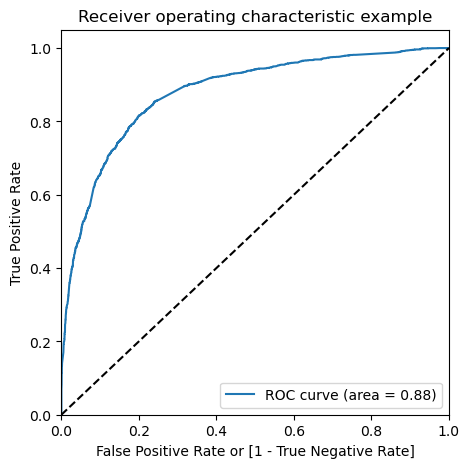

In [116]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

- from the ROC curve a threshold of 0.3 apprears to be good as the ROC curve becomes flatter after this point

In [117]:
# We will create different probability cutoffs and check the model accuracy, specificity and senstivity
numbers = [float(x)/20 for x in range(20)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_prob  Prospect Index  predicted_1  0.0  0.05  0.1  \
0          0        0.105788            5491            0    1     1    1   
1          0        0.596267            3850            1    1     1    1   
2          0        0.425819            3692            0    1     1    1   
3          0        0.554235            6920            1    1     1    1   
4          1        0.456506            1432            0    1     1    1   

   0.15  0.2  0.25  0.3  0.35  0.4  0.45  0.5  0.55  0.6  0.65  0.7  0.75  \
0     0    0     0    0     0    0     0    0     0    0     0    0     0   
1     1    1     1    1     1    1     1    1     1    0     0    0     0   
2     1    1     1    1     1    1     0    0     0    0     0    0     0   
3     1    1     1    1     1    1     1    1     1    0     0    0     0   
4     1    1     1    1     1    1     1    0     0    0     0    0     0   

   0.8  0.85  0.9  0.95  
0    0     0    0     0  
1    0     0    0     0  
2    0     0    0     0  
3    0     0    0     0  
4    0     0    0     0

In [118]:
# We will noe calculate accuracy sensitivity and specificity for various probability thresholds
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.378340  1.000000  0.000000
0.05  0.05  0.436069  0.994536  0.096188
0.10  0.10  0.594943  0.965952  0.369148
0.15  0.15  0.697837  0.929802  0.556664
0.20  0.20  0.750000  0.902900  0.656946
0.25  0.25  0.791985  0.856242  0.752878
0.30  0.30  0.797074  0.839008  0.771553
0.35  0.35  0.805503  0.806221  0.805065
0.40  0.40  0.808524  0.763346  0.836019
0.45  0.45  0.811387  0.725515  0.863648
0.50  0.50  0.810751  0.686843  0.886160
0.55  0.55  0.807093  0.651955  0.901509
0.60  0.60  0.791826  0.569147  0.927347
0.65  0.65  0.785941  0.531736  0.940650
0.70  0.70  0.777195  0.492224  0.950627
0.75  0.75  0.770674  0.458176  0.960860
0.80  0.80  0.756679  0.403951  0.971348
0.85  0.85  0.733938  0.326608  0.981837
0.90  0.90  0.712627  0.257671  0.989511
0.95  0.95  0.689408  0.188314  0.994372


In [119]:
# Plotting accuracy sensitivity and specificity for various probabilities.


fig, ax = plt.subplots(figsize=(20, 10))
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'], ax=ax)
plt.xticks([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95])
ax.set_xlabel('Probability', fontsize=16)
ax.set_ylabel('% Value', fontsize=16)
ax.tick_params(axis = 'x', labelsize =14)
ax.tick_params(axis = 'y', labelsize =14)
plt.title('Probability vs Accuracy-Senstivity-Specificity Graphs')
plt.show()


- From the above graph, approx 0.35 is the optimum point to take it as a cutoff probability.

In [120]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

Converted  Converted_prob  Prospect Index  predicted_1  0.0  0.05  0.1  \
0          0        0.105788            5491            0    1     1    1   
1          0        0.596267            3850            1    1     1    1   
2          0        0.425819            3692            0    1     1    1   
3          0        0.554235            6920            1    1     1    1   
4          1        0.456506            1432            0    1     1    1   

   0.15  0.2  0.25  0.3  0.35  0.4  0.45  0.5  0.55  0.6  0.65  0.7  0.75  \
0     0    0     0    0     0    0     0    0     0    0     0    0     0   
1     1    1     1    1     1    1     1    1     1    0     0    0     0   
2     1    1     1    1     1    1     0    0     0    0     0    0     0   
3     1    1     1    1     1    1     1    1     1    0     0    0     0   
4     1    1     1    1     1    1     1    0     0    0     0    0     0   

   0.8  0.85  0.9  0.95  final_predicted  
0    0     0    0     0                0  
1    0     0    0     0                1  
2    0     0    0     0                1  
3    0     0    0     0                1  
4    0     0    0     0                1

In [121]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8055025445292621

In [122]:
# Creating final confusion matrix on training predictions with Probability Cutoff 0.35
confusion_train = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_train

array([[3147,  762],
       [ 461, 1918]], dtype=int64)

In [123]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

In [124]:
# Calculating Sensitivity for Probability cutoff threshold - 0.35
TP / float(TP+FN)

0.8062211013030686

In [125]:
# Calculating Specificity for threshold - 0.35
TN / float(TN+FP)

0.805065234075211

### Calculating Precision and Recall

In [126]:
# Importing precision and recall scores for calculation
from sklearn.metrics import precision_score, recall_score

In [127]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7156716417910448

In [128]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8062211013030686

### Understanding Precision Recall Trade Off

In [129]:
from sklearn.metrics import precision_recall_curve

In [130]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       0
 4       1
 5       1
 6       0
 7       0
 8       1
 9       0
 10      0
 11      0
 12      1
 13      0
 14      0
 15      1
 16      0
 17      0
 18      1
 19      0
 20      1
 21      0
 22      0
 23      0
 24      0
 25      1
 26      1
 27      0
 28      0
 29      0
 30      0
 31      1
 32      0
 33      1
 34      0
 35      1
 36      0
 37      0
 38      1
 39      0
 40      0
 41      1
 42      1
 43      1
 44      1
 45      0
 46      0
 47      0
 48      1
 49      0
 50      1
 51      0
 52      0
 53      0
 54      0
 55      0
 56      1
 57      1
 58      0
 59      1
 60      0
 61      1
 62      0
 63      0
 64      0
 65      0
 66      0
 67      1
 68      0
 69      0
 70      1
 71      1
 72      0
 73      1
 74      0
 75      1
 76      1
 77      0
 78      1
 79      0
 80      1
 81      1
 82      0
 83      0
 84      1
 85      0
 86      0
 87      0
 88      0
 89      0
 90      1

In [131]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

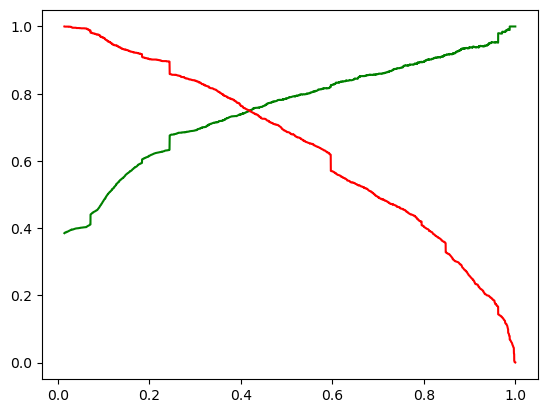

In [132]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

- If we have to balance Precision and Recall 0.4 could be a good Probability threshold

### Making Predictions on Test Data

In [133]:
# Transforming Test data with the scaler
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [134]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_iter.columns]

# Adding a constant variable 
X_test_sm = sm.add_constant(X_test_new)

In [135]:
# Making predictions on test data
y_test_pred = res.predict(X_test_sm)
y_test_pred[:5]

602     0.198163
3666    0.116551
8749    0.990604
3149    0.417714
4983    0.596267
dtype: float64

In [136]:
# Converting y_test_pred to a dataframe 
y_test_pred_1 = pd.DataFrame(y_test_pred)

In [137]:
# Viewing Data Head
y_test_pred_1.head()

0
602   0.198163
3666  0.116551
8749  0.990604
3149  0.417714
4983  0.596267

In [138]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [139]:
# Putting CustID to index
y_test_df['Prospect Index'] = y_test_df.index

In [140]:
# Removing index for both dataframes to append them side by side 
y_test_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [141]:
# Appending y_test_df and y_test_pred_1
y_test_pred_final = pd.concat([y_test_df, y_test_pred_1],axis=1)

In [142]:
y_test_pred_final.head()

Converted  Prospect Index         0
0          0             602  0.198163
1          0            3666  0.116551
2          1            8749  0.990604
3          1            3149  0.417714
4          1            4983  0.596267

In [143]:
# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [144]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex(['Prospect_ID','Converted','Converted_prob'], axis=1)

In [145]:
# Using Probability threshold 0.35 to make predictions for Converted Prospects
y_test_pred_final['final_predicted'] = y_test_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [146]:
# Calculating overall accuracy.
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

0.8063079777365492

In [147]:
confusion_test = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted )
confusion_test

array([[1362,  314],
       [ 208,  811]], dtype=int64)

In [148]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [149]:
# Calculaitng sensitivity for test data with Probability Threshold - 0.35
TP / float(TP+FN)

0.7958783120706575

In [150]:
# Let us calculate specificity for test data with Probability Threshold - 0.35
TN / float(TN+FP)

0.8126491646778043

In [151]:
precision_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

0.7208888888888889

In [152]:
recall_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

0.7958783120706575

In [159]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_pred_final.Converted, y_test_pred_final.Converted_prob, 
                                         drop_intermediate = False )

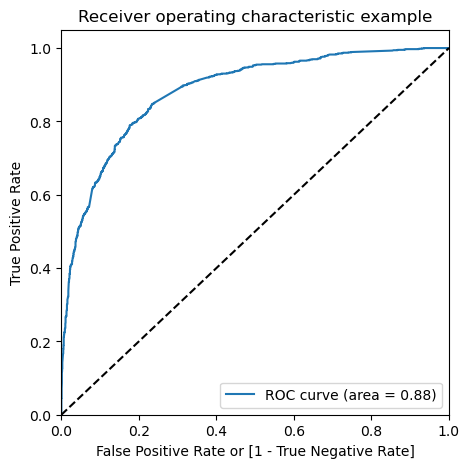

In [160]:
draw_roc(y_test_pred_final.Converted, y_test_pred_final.Converted_prob)

### Final Results

- The final Model for Logistic Regression is as follows

Converted_Probability = -1.2937 + Do Not Email*(-1.3943) + Total Time Spent on Website*(1.1312) + Lead Source_Olark Chat*(1.2305) + Lead Source_Other_cat*(0.9639) + Lead Source_Reference*(4.0761) + Lead Source_Welingak Website*(6.4766) + 
Last Activity_Email Bounced*(-1.3540) + Last Activity_Email Opened*(0.3601) + Last Activity_Olark Chat Conversation*(-1.0776) +
What is your current occupation_Unemployed*(-0.4212) + What is your current occupation_Working Professional*(2.2215) +
Last Notable Activity_Other_Act*(1.9295) + Last Notable Activity_SMS Sent*(1.8812)

                           

#### Accuracy Scores

##### Training Data Scores calculated at probability cutoff threshold = 0.35
- Accuracy = 80.6%
- Sensitivity = 80.6%
- Specificity = 80.5%
- Precision = 71.6%
- Recall = 80.6%



##### Test Data Scores calculated at probability cutoff threshold = 0.35
- Accuracy = 80.6%
- Sensitivity = 79.6%
- Specificity = 81.2%
- Precision = 72.0%
- Recall = 79.6%%

##### Thus, the model performs well on seen and unseen data with an accuracy of more than 80%. The model will this accuratly help is in predicting Conversion for Leads

## Understanding top predictors

In [153]:
# Creating a data frame for final features
pd.options.display.float_format= '{:.2f}'.format
final_features=res.params[1:]

final_features_df = pd.DataFrame(final_features)
final_features_df =final_features_df.reset_index()
final_features_df.shape
final_features_df.columns = ['Feature_Name', 'Coeff']
print(final_features_df)

                                         Feature_Name  Coeff
0                                        Do Not Email  -1.39
1                         Total Time Spent on Website   1.13
2                              Lead Source_Olark Chat   1.23
3                               Lead Source_Other_cat   0.96
4                               Lead Source_Reference   4.08
5                        Lead Source_Welingak Website   6.48
6                         Last Activity_Email Bounced  -1.35
7                          Last Activity_Email Opened   0.36
8               Last Activity_Olark Chat Conversation  -1.08
9          What is your current occupation_Unemployed  -0.42
10  What is your current occupation_Working Profes...   2.22
11                    Last Notable Activity_Other_Act   1.93
12                     Last Notable Activity_SMS Sent   1.88


#### Plotting the final features

In [155]:
final_features_sort = final_features_df.sort_values('Coeff')
plt.barh(final_features_sort['Feature_Name'], final_features_sort['Coeff'])
plt.xlabel('Coeff')
plt.ylabel('Feature_Name')
plt.title('Final Model Features and Coefficients')

for i, value in enumerate(final_features_sort['Coeff']):
    plt.text(value, i, f'{value:.2f}', ha='left', va='center')
    
plt.show()

#### Top Three variables which lead to a higher conversion rate are

- Lead Source_Welingak Website     6.48
- Lead Source_Reference     4.08
- What is your current occupation_Working Professional    2.22


### End of Assignment